<a href="https://colab.research.google.com/github/vilcagamarracf/Inv_arroz_METRIC/blob/main/Snippets/Snippets_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Snippets - Colaboratory 👨‍🚀

<center>
<!-- <h2> Pandas Snippets - Colaboratory 👨‍🚀</h2> -->
  <img src='https://www.freecodecamp.org/news/content/images/size/w2000/2020/07/pandas-logo.png' alt='Pandas logo' width='400'/>
</center>

**Referencias principales**
 
- Página Oficial de Pandas: https://pandas.pydata.org/
- Cheatsheets:
  - [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
  - [Dataquest Pandas Cheat Sheet](https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view)

**Revisando documentación**
- [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv)
- [`pandas.DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex) 
  - Attributes: date, year, month, day, hour, minute
  - Methods: strftime 
- [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime)

# Snippets 

Conjunto de casos donde resolvemos ciertas dudas usando `pandas` en las siguientes secciones.

Casos puntuales:
- Filtrar un columna de datos por filas que contengan un string específico
  - https://www.statology.org/pandas-filter-rows-containing-string/
- Ordenando los valores de una columna de datos 
  - https://www.educba.com/pandas-sort-by-column/

**Tutoriales**
- [How to Filter Data in Python Pandas Dataframes using Conditional Statements](https://medium.com/@AIWatson/how-to-filter-data-in-python-pandas-dataframes-using-conditional-statements-69c4bb842de8)
- [How to select data from a Python Pandas DataFrame using loc and iloc in Jupyter Lab](https://medium.com/@AIWatson/select-data-from-a-pandas-dataframe-using-loc-and-iloc-in-jupyter-lab-b1c05c8248dd)
- [How to extract and clean data from multiple excel sheets using python?](https://muadelm.medium.com/how-to-extract-and-clean-data-from-multiple-excel-sheets-using-python-5d506d959a05)

##### Lectura y tratamiento de datos: Corregir encabezados con espacios
  

- `strip()` permite eliminar espacios a la izquierda y derecha de un `string`

In [ ]:
df_tinajones = pd.read_csv('Tinajones_datos_met_2021.csv', na_values='S/D')

# Eliminar espacios vacíos en encabezados
df_tinajones.columns = [i.strip() for i in df_tinajones.columns.tolist()] # O en Excel usar =ESPACIOS()

# Se tiene columna de fecha y horas -> Unirlos
df_tinajones['FECHA Larga'] = pd.to_datetime(df_tinajones['FECHA'] + ' ' + df_tinajones['HORA'], format='%d/%m/%Y %H:%M')

df_tinajones

In [ ]:
df_tinajones.columns # Corregido 

Index(['FECHA', 'HORA', 'TEMPERATURA (degree C)', 'PRECIPITACION (mm/hora)',
       'HUMEDAD (%)', 'DIRECCION DEL VIENTO (degree)',
       'VELOCIDAD DEL VIENTO (m/s)'],
      dtype='object')

##### Lectura de un `.csv` (no tan simple) 
  

- Caso: El archivo `.csv` presenta espacios en blanco, na values y filas en blanco para separar información de estación de los datos
- Fuente: https://es.stackoverflow.com/questions/382281/obtengo-el-error-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xf3-in-po

In [ ]:
# Lectura de datos (registra cada 5 min) de la estación automática Vista Florida - Lambayeque
ruta_vf = '/content/estacion_vista_florida.csv'
df_vf = pd.read_csv(ruta_vf, encoding='latin-1',
                    skiprows=(0,1,2,3,4), 
                    skip_blank_lines=True, 
                    na_values='--',
                    decimal=',' # Para considerar numeros en lugar de string: ejemplo 0,33 como 0.33
                    )

# Columna principal en formato fecha para posterior filtrado
df_vf['Date & Time'] = pd.to_datetime(df_vf['Date & Time'], format='%d/%m/%y %I:%M %p')

# Nuevas columnas a partir de la primera para filtrado
df_vf['Fecha'] = pd.DatetimeIndex(df_vf['Date & Time']).strftime('%Y-%m-%d')
df_vf['Hora'] = pd.DatetimeIndex(df_vf['Date & Time']).hour
df_vf['Minuto'] = pd.DatetimeIndex(df_vf['Date & Time']).minute

# Recorte de tabla
df_vf = df_vf[['Date & Time', 'Fecha', 'Hora', 'Minuto', 'ET - mm']]

# Filtrado por fecha
# df_vf = df_vf[df_vf['Hora'] == 15] 
df_vf = df_vf[(df_vf['Hora'] == 15) & (df_vf['Minuto'] == 45)]

# Filtrado con lista de fechas de imágenes satelitales
df_vf = df_vf[df_vf['Fecha'].isin(fechas_reportel8)]
df_vf

,Date & Time,Fecha,Hora,Minuto,ET - mm
3945,2021-08-14 15:45:00,2021-08-14,15,45,"0,00"
8531,2021-08-30 15:45:00,2021-08-30,15,45,"0,00"
13139,2021-09-15 15:45:00,2021-09-15,15,45,"0,00"
17738,2021-10-01 15:45:00,2021-10-01,15,45,"0,00"
22346,2021-10-17 15:45:00,2021-10-17,15,45,"0,00"
26857,2021-11-02 15:45:00,2021-11-02,15,45,"0,00"
31441,2021-11-18 15:45:00,2021-11-18,15,45,"0,00"
36032,2021-12-04 15:45:00,2021-12-04,15,45,"0,00"
40636,2021-12-20 15:45:00,2021-12-20,15,45,"0,00"


##### Guardar un dataframe en un documento .csv con encoding utf-8 
  

- Caso: Cuando se requiera exportar un dataframe a .csv se obtienen ciertos inconvenientes tales como:
  - Se genera una columna de indices al inicio
  - Los nombres del encabezado al no ser compatibles con el encoding utf-8 se verán alterados presentando así carácteres extraños 
- Fuente: https://stackoverflow.com/questions/25788037/pandas-df-to-csvfile-csv-encode-utf-8-still-gives-trash-characters-for-min

In [ ]:
reporteL8_RAW.to_csv('reporteL8_RAW_2021.csv', index=False, encoding='utf-8-sig')
# Nota: encoding='latin-1' también se usa en windows, probar en todo caso

##### Obtener fechas a partir de una columna de datos en milisegundos: año, mes, dia y dia juliano (doy)

- [`pandas.DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex) 
  - Attributes: date, year, month, day, hour, minute
  - Methods: strftime 

In [ ]:
def add_date_info(df):

  # A partir de una columna de datos en milisegundos
  df['Timestamp'] = pd.to_datetime(df['millis'], unit='ms')

  # Obtener año, mes, dia y dia juliano
  df['Year'] = pd.DatetimeIndex(df['Timestamp']).year
  df['Month'] = pd.DatetimeIndex(df['Timestamp']).month
  df['Day'] = pd.DatetimeIndex(df['Timestamp']).day
  df['DOY'] = pd.DatetimeIndex(df['Timestamp']).dayofyear
  
  return df

##### Agrupar mensual o anualmente un conjunto de datos con `.resample`

- [Pandas user guide: Resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)
- [`pandas.DataFrame.resample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html#pandas-dataframe-resample)
  - Nota: Tener cuidado con el atributo `rule` ya que si se desconoce su uso, es posible obtener datos al primer dia o al final de un mes, año, etc.

In [ ]:
# Pp mensual
# pp_mensual = df1.resample(rule='M').sum() # mensual

# PP max 24 horas anual
# pp_mensual = df1.resample(rule='A').sum() # Anual

##### Leyendo dataframe a partir de un diccionario

In [ ]:
# import pandas as pd

data = {
    "dia": ["lu", "ma", "mi"],
    "ciudades": ["lima", "bogota", "queretaro"],
    "casos": [123, 456, 789],
}

df = pd.DataFrame(data, columns=data.keys())
df

# df.to_csv("mydataframe2.csv")

,dia,ciudades,casos
0,lu,lima,123
1,ma,bogota,456
2,mi,queretaro,789


In [ ]:
df.casos.describe()

count      3.0
mean     456.0
std      333.0
min      123.0
25%      289.5
50%      456.0
75%      622.5
max      789.0
Name: casos, dtype: float64

In [ ]:
df.dia.describe()

count      3
unique     3
top       lu
freq       1
Name: dia, dtype: object

##### Prueba de datos dudosos (outliers) - Estación pluviométrica

Referencia: [Hidrología con Python Prueba de datos dudosos - Youtube](https://www.youtube.com/watch?v=cAoV7RaSdz0)


In [ ]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [ ]:
estacion = pd.read_csv('/content/prueba_altamiza.csv') # index_col='Fecha'
estacion

,Fecha,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Setiembre,Octubre,Noviembre,Diciembre
0,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,1973,22.0,45.0,31.0,20.0,20.0,30.1,5.0,9.0,10.0,4.4,10.0,10.0
2,1974,18.0,70.5,20.0,33.0,9.9,15.0,10.9,4.8,4.4,10.0,18.0,10.1
3,1975,20.2,10.7,11.6,10.5,16.0,16.0,30.0,15.8,2.0,12.0,7.0,1.6
4,1976,30.0,36.0,30.0,30.0,14.0,0.1,2.0,6.0,5.0,8.0,10.2,6.0
5,1977,60.0,40.0,45.0,26.0,18.2,4.0,0.3,2.6,10.0,2.1,4.0,10.2
6,1978,6.2,50.1,30.1,60.0,8.8,0.0,2.4,0.0,0.4,0.6,0.5,5.0
7,1979,38.6,60.1,30.0,28.6,20.0,4.2,0.0,12.2,12.2,3.4,0.0,3.1
8,1980,7.4,7.2,28.7,17.9,5.4,0.0,0.0,0.0,0.0,4.2,4.1,4.1
9,1981,12.1,38.1,28.5,25.4,16.6,5.6,3.4,0.0,6.5,5.0,4.5,9.2


In [ ]:
estacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha      23 non-null     int64  
 1   Enero      21 non-null     float64
 2   Febrero    20 non-null     float64
 3   Marzo      21 non-null     float64
 4   Abril      20 non-null     float64
 5   Mayo       18 non-null     float64
 6   Junio      18 non-null     float64
 7   Julio      18 non-null     float64
 8   Agosto     19 non-null     float64
 9   Setiembre  19 non-null     float64
 10  Octubre    18 non-null     float64
 11  Noviembre  20 non-null     float64
 12  Diciembre  19 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 2.5 KB


In [ ]:
print('1\n',estacion.iloc[:,0].head())

# 1. Convertir a tipo fecha
estacion.Fecha = pd.to_datetime(estacion.Fecha) # devuelve a datetime64[ns] (tipo fecha)
print('2\n',estacion.iloc[:,0].head())

# En caso de querer modificar el formato de fechas:

# # 2. Modificar el formato (convierte a string)
import datetime as dt
estacion.Fecha = estacion.Fecha.dt.strftime('%Y') # convierte a string según formato : '%Y/%m/%d'
print('3\n',estacion.iloc[:,0].head())

# # 3. Convertir otra vez a tipo fecha
estacion.Fecha = pd.to_datetime(estacion.Fecha)
print('4\n',estacion.iloc[:,0].head())

1
 0    1972
1    1973
2    1974
3    1975
4    1976
Name: Fecha, dtype: int64
2
 0   1970-01-01 00:00:00.000001972
1   1970-01-01 00:00:00.000001973
2   1970-01-01 00:00:00.000001974
3   1970-01-01 00:00:00.000001975
4   1970-01-01 00:00:00.000001976
Name: Fecha, dtype: datetime64[ns]
3
 0    1970
1    1970
2    1970
3    1970
4    1970
Name: Fecha, dtype: object
4
 0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
Name: Fecha, dtype: datetime64[ns]


In [ ]:
estacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13869 entries, 0 to 13868
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ESTACION      13869 non-null  object        
 1   OPERADOR      13869 non-null  object        
 2   VARIABLE      13869 non-null  object        
 3   FECHA         13869 non-null  datetime64[ns]
 4   HORA          13869 non-null  object        
 5   VALOR         13869 non-null  float64       
 6   UNIDADMEDIDA  13869 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 758.6+ KB


In [ ]:
datos = estacion.drop(['Fecha'], axis=1)
datos

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Setiembre,Octubre,Noviembre,Diciembre
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,22.0,45.0,31.0,20.0,20.0,30.1,5.0,9.0,10.0,4.4,10.0,10.0
2,18.0,70.5,20.0,33.0,9.9,15.0,10.9,4.8,4.4,10.0,18.0,10.1
3,20.2,10.7,11.6,10.5,16.0,16.0,30.0,15.8,2.0,12.0,7.0,1.6
4,30.0,36.0,30.0,30.0,14.0,0.1,2.0,6.0,5.0,8.0,10.2,6.0
5,60.0,40.0,45.0,26.0,18.2,4.0,0.3,2.6,10.0,2.1,4.0,10.2
6,6.2,50.1,30.1,60.0,8.8,0.0,2.4,0.0,0.4,0.6,0.5,5.0
7,38.6,60.1,30.0,28.6,20.0,4.2,0.0,12.2,12.2,3.4,0.0,3.1
8,7.4,7.2,28.7,17.9,5.4,0.0,0.0,0.0,0.0,4.2,4.1,4.1
9,12.1,38.1,28.5,25.4,16.6,5.6,3.4,0.0,6.5,5.0,4.5,9.2


In [ ]:
Periodo = list(estacion['Fecha'])
print('lista de años:\n',Periodo)

# Prueba
Precipitacion_max1 = list(datos.max(axis=1))
print('\nSelección de máximos valores por año:\n',Precipitacion_max1)

Precipitacion_max  = list(datos.max(axis=1)*1.33)
print('\nMáximos valores por año * 1.33 con 3 decimales:\n', np.around(Precipitacion_max, decimals=3))

lista de años:
 [1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994]

Selección de máximos valores por año:
 [20.0, 45.0, 70.5, 30.0, 36.0, 60.0, 60.0, 60.1, 28.7, 38.1, 15.4, 25.3, 16.4, 10.2, 8.7, 8.9, 13.2, 6.9, 11.2, 8.5, 3.2, 4.2, 9.5]

Máximos valores por año * 1.33 con 3 decimales:
 [26.6   59.85  93.765 39.9   47.88  79.8   79.8   79.933 38.171 50.673
 20.482 33.649 21.812 13.566 11.571 11.837 17.556  9.177 14.896 11.305
  4.256  5.586 12.635]


In [ ]:
len(Periodo)

23

In [ ]:
a = np.zeros([23,3])

for i in range(23):
  a[i][0] = Periodo[i]
  a[i][1] = Precipitacion_max[i]
  a[i][2] = np.around(log10(Precipitacion_max[i]), decimals=3)

In [ ]:
Resultado = pd.DataFrame({ 'Año': a[:,0], 'Pmax': a[:,1], 'Pmax_log': a[:,2] })
print(Resultado)

       Año    Pmax  Pmax_log
0   1972.0  26.600     1.425
1   1973.0  59.850     1.777
2   1974.0  93.765     1.972
3   1975.0  39.900     1.601
4   1976.0  47.880     1.680
5   1977.0  79.800     1.902
6   1978.0  79.800     1.902
7   1979.0  79.933     1.903
8   1980.0  38.171     1.582
9   1981.0  50.673     1.705
10  1982.0  20.482     1.311
11  1983.0  33.649     1.527
12  1984.0  21.812     1.339
13  1985.0  13.566     1.132
14  1986.0  11.571     1.063
15  1987.0  11.837     1.073
16  1988.0  17.556     1.244
17  1989.0   9.177     0.963
18  1990.0  14.896     1.173
19  1991.0  11.305     1.053
20  1992.0   4.256     0.629
21  1993.0   5.586     0.747
22  1994.0  12.635     1.102


In [ ]:
kn = 2.486
st = np.array([np.std(list(Resultado['Pmax_log']))])
med = np.array([np.mean(list(Resultado['Pmax_log']))])
YH = med+kn*st
YL = med-kn*st
QH = 10**YH
QL = 10**YL
st

array([0.37775719])

In [ ]:
# Parámetros Estadísticos
estadistica = pd.DataFrame({'std':st,'mean':med})
estadistica

,std,mean
0,0.377757,1.382826


In [ ]:
# Umbrales de Datos dudosos Altos y Bajos
Umbral = pd.DataFrame({'QH':QH, 'QL':QL, 'YH':YH, 'YL':YH})
Umbral

,QH,QL,YH,YL
0,209.860378,2.777933,2.32193,2.32193


In [ ]:
estadistica = pd.DataFrame({'std':st,'mean':med})
print('Parámetros Estadísticos')
print('-----------------------\n', estadistica)

print('')

Umbral = pd.DataFrame({'QH':QH, 'QL':QL, 'YH':YH, 'YL':YH})
print('Umbrales de Datos dudosos Altos y Bajos')
print('---------------------------------------\n', Umbral)

Parámetros Estadísticos
-----------------------
         std      mean
0  0.377757  1.382826

Umbrales de Datos dudosos Altos y Bajos
---------------------------------------
            QH        QL       YH       YL
0  209.860378  2.777933  2.32193  2.32193


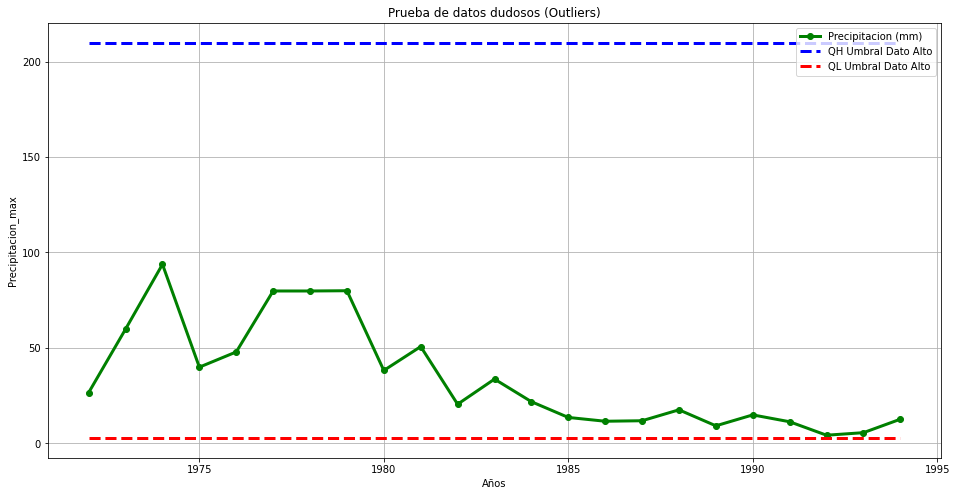

In [ ]:
x = a[:,0]
y = a[:,1]
z = 0*x + QH
k = 0*x + QL

# Visualización
plt.figure(1,figsize=(16,8)) # Tamaño de la imagen: figsize(largo, alto)
plt.plot(x,y,'go-', linewidth=3, label='Precipitacion (mm)')  # Color verde: Serie temporal (datos)
plt.plot(x,z,'b--', linewidth=3, label='QH Umbral Dato Alto') # Color azul
plt.plot(x,k,'r--', linewidth=3, label='QL Umbral Dato Alto') # Color rojo
plt.legend(loc=1) # ubicación de la leyenda (probar valores 1-9)
plt.grid(True) # Grillado
plt.title('Prueba de datos dudosos (Outliers)')
plt.xlabel('Años')
plt.ylabel('Precipitacion_max');

##### Pandas: display dataframes as interactive tables [source](https://colab.research.google.com/notebooks/snippets/bigquery.ipynb#scrollTo=rn_R__1dTl7M)

**Nota**: Para replicar este ejemplo es necesario tener cuenta de Google Earth Engine. Los outputs ya están ahí para su visualización.

Iniciar visualización interactiva de `pandas`:

    %load_ext google.colab.data_table

Volver a la visualización de `pandas` por defecto:

    %unload_ext google.colab.data_table


In [ ]:
# @markdown *Función* : `generarReporteAnual()`

import pandas as pd

def listar_propiedades(imgCol=None, propiedad=None):
  return imgCol.reduceColumns(ee.Reducer.toList(),[propiedad]).get("list").getInfo()

def listar_fecha(imgCol):
    def func_ejv(im):
        return ee.String(ee.Image(im).date().format('YYYY/MM/dd')).slice(0)
    return imgCol.toList(imgCol.size(), 0).map(func_ejv).getInfo()

def generarReporteAnual(ID_ImgCol_name=None, long=None, lat=None, inicio=None, fin=None):
  imgCol = ee.ImageCollection(ID_ImgCol_name)\
             .filterDate(inicio, fin)\
             .filterBounds(ee.Geometry.Point([long, lat]))

  dic = {
      "ID": listar_propiedades(imgCol, "LANDSAT_ID"), 
      "Fecha": listar_fecha(imgCol),
      "Porcentaje Nube (%)": listar_propiedades(imgCol, "CLOUD_COVER"),
      "PATH": listar_propiedades(imgCol, "WRS_PATH"),
      "ROW": listar_propiedades(imgCol, "WRS_ROW"),
      "Zenith Angle": listar_propiedades(imgCol, "SOLAR_ZENITH_ANGLE"),
      }
  
  df1 = pd.DataFrame(dic)
  return df1

In [ ]:
# Ejemplo 1

# Cargar visualización interactiva de pandas
%load_ext google.colab.data_table

generarReporteAnual("LANDSAT/LC08/C01/T1_SR", -79.809, -6.746, '2020-01-01', '2021-01-01')

,ID,Fecha,Porcentaje Nube (%),PATH,ROW,Zenith Angle
0,LC08_L1TP_010065_20200116_20200128_01_T1,2020/01/16,3.14,10,65,32.330326
1,LC08_L1TP_010065_20200201_20200211_01_T1,2020/02/01,61.18,10,65,32.084152
2,LC08_L1TP_010065_20200217_20200225_01_T1,2020/02/17,5.40,10,65,31.332012
3,LC08_L1TP_010065_20200304_20200314_01_T1,2020/03/04,3.55,10,65,30.655491
4,LC08_L1TP_010065_20200320_20200326_01_T1,2020/03/20,12.42,10,65,30.643269
5,LC08_L1TP_010065_20200405_20200410_01_T1,2020/04/05,60.64,10,65,31.678082
6,LC08_L1TP_010065_20200421_20200508_01_T1,2020/04/21,1.66,10,65,33.694965
7,LC08_L1TP_010065_20200507_20200509_01_T1,2020/05/07,27.11,10,65,36.267532
8,LC08_L1TP_010065_20200523_20200607_01_T1,2020/05/23,71.28,10,65,38.752293
9,LC08_L1TP_010065_20200608_20200625_01_T1,2020/06/08,87.18,10,65,40.636333


In [ ]:
# Ejemplo 2

# Volver a visualización por defecto
%unload_ext google.colab.data_table

generarReporteAnual("LANDSAT/LC08/C01/T1_SR", -79.809, -6.746, '2020-01-01', '2021-01-01')

,ID,Fecha,Porcentaje Nube (%),PATH,ROW,Zenith Angle
0,LC08_L1TP_010065_20200116_20200128_01_T1,2020/01/16,3.14,10,65,32.330326
1,LC08_L1TP_010065_20200201_20200211_01_T1,2020/02/01,61.18,10,65,32.084152
2,LC08_L1TP_010065_20200217_20200225_01_T1,2020/02/17,5.40,10,65,31.332012
3,LC08_L1TP_010065_20200304_20200314_01_T1,2020/03/04,3.55,10,65,30.655491
4,LC08_L1TP_010065_20200320_20200326_01_T1,2020/03/20,12.42,10,65,30.643269
5,LC08_L1TP_010065_20200405_20200410_01_T1,2020/04/05,60.64,10,65,31.678082
6,LC08_L1TP_010065_20200421_20200508_01_T1,2020/04/21,1.66,10,65,33.694965
7,LC08_L1TP_010065_20200507_20200509_01_T1,2020/05/07,27.11,10,65,36.267532
8,LC08_L1TP_010065_20200523_20200607_01_T1,2020/05/23,71.28,10,65,38.752293
9,LC08_L1TP_010065_20200608_20200625_01_T1,2020/06/08,87.18,10,65,40.636333


In [ ]:
# Conectar con nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Actualizar librerías
# %%capture
# !pip install --upgrade seaborn
# !pip install --upgrade pandas

In [ ]:
# Importar librerías principales
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5] # Establecemos el ploteo de series de tiempo con un determinado tamaño

import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
sns.__version__

'0.11.2'

# Más cosas

## Exploración de datos

#### Importar base de datos

- `pd.read_csv()`
- `pd.DataFrame()`

Usaremos datos de precipitación en formato `.csv` alojado en nuestro drive.

> Nota: Si el archivo .csv pesa demasiado (> 500mb), procurar no abrirlo directamente ya que tomaría mucho tiempo en hacerlo. Es mejor usar python o R para revisarlo. Si se abre excel, éste no cargaría y daría un error tipo Permission Denied en python si se tratara de abrir con este.

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/pp_salida1.csv'
df = pd.read_csv(path)
df.head()

,DATE,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P122,P123,P124,P125,P126,P127,P128,P129,P130,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149,P150,P151,P152,P153,P154,P155,P156,P157,P158,P159,P160,P161
0,01/01/1981,10.608933,6.087344,2.554819,1.307060,0.484502,0.188186,24.257719,22.962580,11.376714,3.857701,1.647270,0.811294,0.359088,0.186841,0.000000,0.000000,52.616318,48.858070,24.256874,9.159005,3.093917,1.252966,0.811074,0.274194,0.000000,0.000000,0.000000,0.000000,36.880219,43.434540,35.764172,39.580635,56.130131,16.013351,4.718503,1.902039,0.859711,0.481016,0.068565,...,0.425075,0.316723,0.025086,0.000000,0.274093,NaN,36.037109,31.386620,17.402258,6.924528,2.677795,0.660084,0.182494,0.315802,0.285183,0.000000,0.304540,0.155935,0.000000,0.000000,0.449837,NaN,19.687181,16.325054,10.308766,4.330928,1.805426,0.000000,0.000000,0.000000,0.000000,0.056051,0.000000,0.000000,0.000000,7.172928,1.148665,0.235987,0.072634,11.546514
1,01/02/1981,88.302040,48.279583,20.149616,8.825262,5.386672,4.184337,93.794800,106.047173,74.892715,30.363705,13.499932,7.381920,4.644121,4.146539,4.277095,3.685627,202.192276,208.510559,124.857681,58.178600,26.304296,12.189891,6.334581,4.284571,3.574172,2.799954,2.232891,1.476732,107.178886,147.486572,174.653565,217.806824,272.046875,121.602585,44.495834,20.529625,10.555015,4.619124,2.768187,...,4.003670,1.895880,0.954506,1.059287,1.187011,NaN,112.295944,77.929497,41.602692,22.303392,12.429198,6.847768,5.740261,4.863126,4.693711,4.409077,2.896387,1.934757,1.148166,0.303007,1.064212,NaN,59.465713,33.870655,21.356367,12.852532,7.909398,1.797031,1.805261,1.333051,0.999382,0.376242,1.248018,1.164219,1.144218,19.242121,11.201703,4.407936,3.575433,27.896908
2,01/03/1981,219.949554,247.960113,161.522858,149.679367,154.007523,94.826126,107.531197,186.034454,308.557404,223.643997,159.715591,146.047363,94.827660,60.075138,44.320221,18.800779,224.191071,222.783386,289.425934,338.067413,285.057434,227.004486,184.340469,124.966675,63.393654,37.172169,8.736139,3.427474,134.963745,169.489136,249.990112,339.047638,391.941467,428.368164,446.040558,276.740417,265.690155,250.011093,167.372894,...,16.701656,11.008372,4.654214,2.731664,3.308416,NaN,172.811752,246.889084,257.499878,185.898193,107.180656,101.105553,95.842232,49.996479,18.073946,16.817234,15.093976,9.466349,4.423991,4.771471,18.401443,NaN,174.612915,222.302811,222.771118,192.561859,114.806183,15.107269,10.657434,7.402997,9.822838,27.190750,8.962152,11.100165,7.760459,200.193497,169.388855,196.199921,190.918014,209.497284
3,01/04/1981,36.081974,30.216789,17.982313,8.681037,5.797594,4.216205,50.721863,62.806534,48.815525,25.722694,10.370521,4.289159,1.995343,0.845313,0.531554,0.584511,134.350739,97.135315,82.426155,50.941723,28.146696,12.172368,3.722343,0.977071,0.339680,0.196330,0.123548,0.000000,67.827339,87.922112,137.776367,147.667191,120.035004,60.763752,30.251331,22.892012,10.349721,2.393513,0.485065,...,0.000000,0.000000,0.000000,0.000000,0.470418,NaN,96.438980,88.504211,48.181618,29.831629,18.043003,8.434794,1.854340,0.182587,0.062219,0.038640,0.000000,0.000000,0.000000,0.000000,1.063605,NaN,66.249451,58.233376,44.238487,30.663624,16.508575,0.016816,0.000000,0.000000,0.000000,0.562367,0.000000,0.000000,0.000000,25.005825,16.371099,9.971101,7.750124,29.299707
4,01/05/1981,10.911409,4.697821,1.500158,0.500671,0.155915,0.270658,7.195982,9.269212,5.989180,2.016015,0.751357,0.345770,0.323859,0.302721,0.231500,0.506133,16.903521,12.300612,9.217038,4.448646,1.585664,0.534284,0.358338,0.138082,0.053205,0.000000,0.000000,0.000000,27.495581,23.297497,21.270996,17.539968,14.003787,6.399556,3.178644,1.139975,0.511942,0.294293,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.215915,NaN,14.688814,8.559403,4.861265,3.023998,1.624126,0.712933,0.197089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

#### Información general del dataframe

- `df.info()`
- `df.shape`
- `df.columns`
- `df.dtypes`
- `df.values`

Uso de paréntesis:

- **SI**, para extracción de datos del dataframe
- **NO**, para extracción de información de atributos del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Columns: 162 entries, DATE to P161
dtypes: float64(161), object(1)
memory usage: 546.9+ KB


In [ ]:
print(df.shape)
print(f'Numero de columnas: {df.shape[1]}\nNumero de filas: {df.shape[0]}')

(432, 162)
Numero de columnas: 162
Numero de filas: 432


In [ ]:
# Nombre de las columnas
df.columns

Index(['DATE', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       ...
       'P152', 'P153', 'P154', 'P155', 'P156', 'P157', 'P158', 'P159', 'P160',
       'P161'],
      dtype='object', length=162)

In [ ]:
df.dtypes

DATE     object
P1      float64
P2      float64
P3      float64
P4      float64
         ...   
P157    float64
P158    float64
P159    float64
P160    float64
P161    float64
Length: 162, dtype: object

In [ ]:
df.values # array

array([['01/01/1981', 10.60893345, 6.08734417, ..., 0.235986575,
        0.072634168, 11.54651356],
       ['01/02/1981', 88.3020401, 48.27958298, ..., 4.407935619,
        3.5754330160000003, 27.89690781],
       ['01/03/1981', 219.9495544, 247.96011349999998, ..., 196.1999207,
        190.9180145, 209.4972839],
       ...,
       ['01/10/2016', 0.893621087, 0.042705957, ..., 0.0, 0.0,
        3.414966106],
       ['01/11/2016', 2.635549068, 1.699604392, ..., 0.0, 0.0,
        11.07699203],
       ['01/12/2016', 21.541425699999998, 12.74989319, ...,
        0.44712799799999997, 0.13541334900000002, 23.07868004]],
      dtype=object)

#### Modificando el dataframe

In [ ]:
# Usar un nuevo dataframe a partir de uno
pp = df.iloc[:,:5]
pp.head(3)

,DATE,P1,P2,P3,P4
0,01/01/1981,10.608933,6.087344,2.554819,1.307060
1,01/02/1981,88.302040,48.279583,20.149616,8.825262
2,01/03/1981,219.949554,247.960113,161.522858,149.679367


In [ ]:
pp['P1'].head() # obtener información de columnas

0     10.608933
1     88.302040
2    219.949554
3     36.081974
4     10.911409
Name: P1, dtype: float64

In [ ]:
pp[0:10] # obtener información de filas

,DATE,P1,P2,P3,P4
0,01/01/1981,10.608933,6.087344,2.554819,1.307060
1,01/02/1981,88.302040,48.279583,20.149616,8.825262
2,01/03/1981,219.949554,247.960113,161.522858,149.679367
3,01/04/1981,36.081974,30.216789,17.982313,8.681037
4,01/05/1981,10.911409,4.697821,1.500158,0.500671
5,01/06/1981,5.764244,3.820415,1.964142,0.826890
6,01/07/1981,4.247416,2.146499,0.914938,0.378151
7,01/08/1981,1.471405,1.028794,0.925870,0.696592
8,01/09/1981,0.092305,0.199291,0.000000,0.000000
9,01/10/1981,4.722525,0.945042,1.240797,1.131501


In [ ]:
pp[pp['P1']<5].head()

,DATE,P1,P2,P3,P4
6,01/07/1981,4.247416,2.146499,0.914938,0.378151
7,01/08/1981,1.471405,1.028794,0.925870,0.696592
8,01/09/1981,0.092305,0.199291,0.000000,0.000000
9,01/10/1981,4.722525,0.945042,1.240797,1.131501
14,01/03/1982,1.811702,0.481181,0.000000,0.000000


In [ ]:
df[df['DATE']=='01/03/1982']

,DATE,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P122,P123,P124,P125,P126,P127,P128,P129,P130,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149,P150,P151,P152,P153,P154,P155,P156,P157,P158,P159,P160,P161
14,01/03/1982,1.811702,0.481181,0.0,0.0,0.178068,0.0,8.086207,5.32732,2.377644,0.956698,0.248536,0.198327,0.0,0.0,0.0,0.0,28.515036,21.507725,12.152414,5.48012,2.335033,1.103049,0.864081,0.506442,0.084064,0.135144,0.0,0.0,43.341503,38.369671,37.762657,33.038357,36.401646,13.115384,6.811509,2.538755,1.690813,1.574255,1.196409,...,2.009107,1.587069,0.498109,0.0,0.460949,NaN,45.507065,26.882023,12.543781,4.170943,0.775891,0.218397,0.303417,0.571594,0.977471,2.359098,3.476357,2.018995,0.443288,0.040143,2.700061,NaN,35.240582,22.896198,12.358171,5.612296,1.502795,2.284784,1.350416,0.608436,0.544429,2.720592,0.768972,1.061419,0.693903,12.142465,0.0,0.071642,0.365882,22.068659


#### Modificación de fechas

Información mensual: `01/01/1981`

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/pp_salida1.csv').iloc[:,:5]
df.head()

,DATE,P1,P2,P3,P4
0,01/01/1981,10.608933,6.087344,2.554819,1.307060
1,01/02/1981,88.302040,48.279583,20.149616,8.825262
2,01/03/1981,219.949554,247.960113,161.522858,149.679367
3,01/04/1981,36.081974,30.216789,17.982313,8.681037
4,01/05/1981,10.911409,4.697821,1.500158,0.500671


Al hacer el cambio de tipo object a datetime se produce un cambio: el formato `%d/%m/%Y` cambió a `%Y/%d/%m`. Se debe a que Python trabaja las fechas en formato inglés.

In [ ]:
df1 = df.copy()
df1.DATE = pd.to_datetime(df1.DATE) 
df1.head()

,DATE,P1,P2,P3,P4
0,1981-01-01,10.608933,6.087344,2.554819,1.307060
1,1981-01-02,88.302040,48.279583,20.149616,8.825262
2,1981-01-03,219.949554,247.960113,161.522858,149.679367
3,1981-01-04,36.081974,30.216789,17.982313,8.681037
4,1981-01-05,10.911409,4.697821,1.500158,0.500671


In [ ]:
type(df1.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

Observemos el cambio en la `df['DATE']`
- Antes: `01/01/1981`
- Después: `1981-01-01`

A continuación visualizaremos los datos.

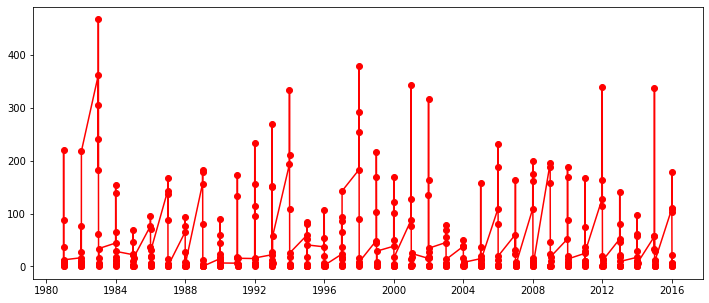

In [ ]:
plt.plot(df1.DATE, df1.P1, 'r-o')
plt.show()

Como podemos observar, los puntos no siguen la forma una serie de tiempo. Python lee las fechas en el formato Inglés.

Con `format='%d/%m/%Y'` podemos indicar el formato de ingreso de nuestras fechas para que sean asignadas de acuerdo a ese formato y no sean confundidas con el formato inglés. 

A continuación veremos el resultado.

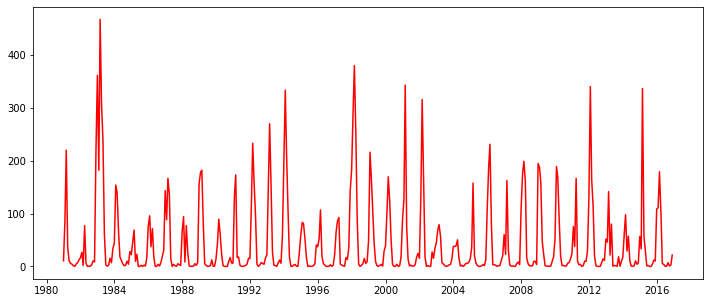

In [ ]:
df2 = df.copy()
df2.DATE = pd.to_datetime(df2.DATE, format='%d/%m/%Y') 

plt.plot(df2.DATE, df2.P1, 'r') # r-o
plt.show()

**Cambiando formato de fechas**

In [ ]:
# Transformar columna de tipo string a tipo datetime64
pp.DATE = pd.to_datetime(pp.DATE, format='%d/%m/%Y')
# Ubicar como index para posterior visualización con matplotlib
pp.set_index('DATE', inplace=True)
pp.head()

,P1,P2,P3,P4
DATE,,,,
1981-01-01,10.608933,6.087344,2.554819,1.307060
1981-02-01,88.302040,48.279583,20.149616,8.825262
1981-03-01,219.949554,247.960113,161.522858,149.679367
1981-04-01,36.081974,30.216789,17.982313,8.681037
1981-05-01,10.911409,4.697821,1.500158,0.500671


## Exploración de datos de precipitación con Pandas

#### Exploración de datos

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

path = r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/data_exploration_Pisco_data.csv'

df = pd.read_csv(path)
print(df.head())

         DATE          P1          P2  ...        P159        P160        P161
0  01/01/1981   10.608933    6.087344  ...    0.235987    0.072634   11.546514
1  01/02/1981   88.302040   48.279583  ...    4.407936    3.575433   27.896908
2  01/03/1981  219.949554  247.960113  ...  196.199921  190.918014  209.497284
3  01/04/1981   36.081974   30.216789  ...    9.971101    7.750124   29.299707
4  01/05/1981   10.911409    4.697821  ...    0.158744    0.000000    6.568554

[5 rows x 162 columns]


##### Propiedades del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 162 entries, DATE to P161
dtypes: float64(161), object(1)
memory usage: 45.7+ KB


In [ ]:
df.shape

(36, 162)

In [ ]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P122,P123,P124,P125,P126,P127,P128,P129,P130,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149,P150,P151,P152,P153,P154,P155,P156,P157,P158,P159,P160,P161
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,0.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,0.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,68.136496,100.800495,93.594899,91.398558,98.474514,101.142808,42.037390,66.787608,123.029898,114.399001,94.095361,91.806222,88.872250,78.522339,62.084480,43.495338,83.398566,80.822104,92.029611,115.900188,115.505419,104.088162,96.872673,77.938035,58.564694,37.593286,20.098397,13.455099,62.800043,76.091123,91.511521,107.555409,120.861264,114.506819,115.272501,112.085378,112.570408,99.446230,73.016671,51.598338,...,36.040165,29.787032,19.361260,15.620158,16.873551,NaN,66.105673,71.656156,65.362947,63.005131,65.827646,67.878178,53.937333,34.594815,28.074370,27.982560,35.393592,29.129165,17.501728,19.006028,53.320164,NaN,48.015673,52.421856,59.385825,68.482049,69.026191,35.282282,31.121544,24.254466,29.812069,68.408357,29.700017,32.454939,27.881172,51.375901,86.843708,107.606098,108.596721,41.950443
std,117.654544,217.952866,212.291638,210.542649,254.184566,282.610909,49.871385,103.492607,265.172137,275.913819,235.565560,237.539903,236.940604,213.540959,171.982256,111.204470,95.927214,104.731706,150.670453,240.639510,288.268212,287.133046,259.979980,198.378855,146.951716,94.245704,48.278664,34.272142,62.906341,85.075862,107.935931,146.241556,180.754823,204.363462,231.894852,274.840151,311.828817,269.410884,197.112079,141.161024,...,94.551310,79.400829,52.711154,43.588182,50.051798,NaN,79.199237,112.825443,128.263140,147.260785,184.463594,187.883253,133.158370,92.435941,74.914207,68.005897,87.081922,72.623080,41.803747,55.886722,192.689929,NaN,62.618079,92.734417,128.228652,177.794308,208.643763,92.218940,78.053160,56.958580,87.884718,257.912334,70.639642,82.378280,69.395893,110.772042,194.295276,250.303589,279.910710,80.055570
min,0.092305,0.121795,0.000000,0.000000,0.000000,0.000000,0.102598,0.317557,0.071345,0.097459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211741,0.295696,0.207555,0.153017,0.021165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.323283,0.355090,0.219090,0.177734,0.131986,0.030367,0.042737,0.066101,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.234379,0.343083,0.118490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.092476,0.150778,0.028558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.288420,1.335464,0.923137,0.470041,0.107755,0.053551,4.991381,3.995830,2.174501,1.041311,0.487593,0.145294,0.003989,0.003172,0.000000,0.000000,8.437088,5.142536,3.131212,1.424554,0.839198,0.336581,0.182161,0.065074,0.000000,0.000000,0.000000,0.000000,13.075721,7.542071,9.685881,7.857351,4.451015,1.938260,0.988506,0.554713,0.272060,0.157793,0.031763,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.053478,NaN,9.710358,7.850472,3.820394,1.988846,1.126246,0.453776,

In [ ]:
df.columns # column names

Index(['DATE', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       ...
       'P152', 'P153', 'P154', 'P155', 'P156', 'P157', 'P158', 'P159', 'P160',
       'P161'],
      dtype='object', length=162)

In [ ]:
df.values

array([['01/01/1981', 10.60893345, 6.08734417, ..., 0.235986575,
        0.072634168, 11.54651356],
       ['01/02/1981', 88.3020401, 48.27958298, ..., 4.407935619,
        3.5754330160000003, 27.89690781],
       ['01/03/1981', 219.9495544, 247.96011349999998, ..., 196.1999207,
        190.9180145, 209.4972839],
       ...,
       ['01/10/1983', 15.52910137, 5.778637409, ..., 3.0028204919999997,
        2.101931572, 13.411285399999999],
       ['01/11/1983', 7.170973301, 4.509151936, ..., 0.28322494, 0.0,
        11.23351383],
       ['01/12/1983', 33.82453918, 19.253555300000002, ...,
        4.1775016780000005, 3.1472878460000002, 24.96240616]],
      dtype=object)

In [ ]:
df.P1.sum() # Suma total de toda la columna

2452.9138541989996

In [ ]:
df.index # row numbers 

RangeIndex(start=0, stop=36, step=1)

##### Ordenar datos / Sorting

In [ ]:
# De menor a mayor, ascendiente
print(df.sort_values('P1').head(20)) # ('P1', ascending=False) # De mayor a menor, descendiente

          DATE         P1        P2  ...      P159      P160       P161
8   01/09/1981   0.092305  0.199291  ...  0.000000  0.000000   0.761746
17  01/06/1982   0.159420  0.121795  ...  0.021152  0.000000   0.343578
31  01/08/1983   0.398891  0.214143  ...  0.018495  0.034325   0.274669
19  01/08/1982   0.476910  0.613945  ...  0.097380  0.018413   0.065282
18  01/07/1982   0.558041  0.143592  ...  0.000000  0.000000   0.082245
7   01/08/1981   1.471405  1.028794  ...  0.442809  0.262143   3.843332
14  01/03/1982   1.811702  0.481181  ...  0.071642  0.365882  22.068659
32  01/09/1983   2.477847  1.175190  ...  0.000000  0.000000   5.205339
20  01/09/1982   3.180798  1.716432  ...  0.717880  0.503853   7.635815
30  01/07/1983   3.324294  1.507304  ...  0.924989  1.003213   0.168854
6   01/07/1981   4.247416  2.146499  ...  0.135636  0.078069   0.000000
9   01/10/1981   4.722525  0.945042  ...  1.267412  0.578110   6.952442
5   01/06/1981   5.764244  3.820415  ...  0.291434  0.036063   2

In [ ]:
#df.sort_values(['PUQUIO', 'LUCANAS'])
df.sort_values(['PUQUIO', 'LUCANAS'],ascending=[True,False]) # Para dos columnas en simultaneo

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
304,01/05/2006,0.000000,0.236984,0.035104,0.081742
413,01/06/2015,0.000000,0.227689,2.022362,2.245133
30,01/07/1983,0.000000,0.135924,0.364467,0.189916
69,01/10/1986,0.000000,0.123978,17.137882,16.260042
54,01/07/1985,0.000000,0.121768,0.128435,0.060986
...,...,...,...,...,...
217,01/02/1999,214.171982,334.774200,252.320099,238.272202
98,01/03/1989,217.413513,313.821258,154.695923,140.655640
50,01/03/1985,256.754273,223.547363,126.289566,111.037994
97,01/02/1989,263.220459,349.853516,158.475845,151.508087


In [ ]:
# Subsetting multiple columns
# df['FECHAS']
df[['FECHAS','PUQUIO']]

,FECHAS,PUQUIO
0,01/01/1981,67.566551
1,01/02/1981,108.670258
2,01/03/1981,33.735352
3,01/04/1981,21.643970
4,01/05/1981,0.140955
...,...,...
427,01/08/2016,1.725140
428,01/09/2016,0.089872
429,01/10/2016,0.178005
430,01/11/2016,5.099917


### Revisar (otros datos)

In [ ]:
# Subsetting rows
#df['PUQUIO']>250
df[df['PUQUIO']>250]

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
50,01/03/1985,256.754273,223.547363,126.289566,111.037994
96,01/01/1989,281.272125,294.638428,234.229309,170.388916
97,01/02/1989,263.220459,349.853516,158.475845,151.508087


In [ ]:
df[df['FECHAS']=='01/03/1985']

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
50,01/03/1985,256.754273,223.547363,126.289566,111.037994


In [ ]:
# Combinación de sentencias lógicas
men_50 = df['PUQUIO'] < 50
may_150 = df['PUQUIO'] > 150
df[men_50 & may_150]

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN


In [ ]:
df[ (df['PUQUIO'] < 50) & (df['PUQUIO'] > 150)]

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN


In [ ]:
# Para incluir dos categorias:  
# a = df['columna'].isin(['valor1','valor2'])
# df[a]

- Adding a new column

In [ ]:
df['SUM'] = df['PUQUIO']+df['LUCANAS']+df['HUANCAPI']+df['VILCASHUAMAN']
df.head()

##### Selecting columns 

In [ ]:
fechas = df['FECHAS'] # Usado para seleccionar columnas con caracteres especiales como * ? ! 
print(fechas)
type(fechas)

0      01/01/1981
1      01/02/1981
2      01/03/1981
3      01/04/1981
4      01/05/1981
          ...    
427    01/08/2016
428    01/09/2016
429    01/10/2016
430    01/11/2016
431    01/12/2016
Name: FECHAS, Length: 432, dtype: object


pandas.core.series.Series

##### Selecting rows with logic

In [ ]:
q = 2**2
s = 4
q == s

True

In [ ]:
puquio = df.PUQUIO
print(puquio)

0       67.566551
1      108.670258
2       33.735352
3       21.643970
4        0.140955
          ...    
427      1.725140
428      0.089872
429      0.178005
430      5.099917
431     29.889318
Name: PUQUIO, Length: 432, dtype: float64


In [ ]:
puquio > 50 # Se hará la comparación de cada valor con la condicional 

0       True
1       True
2      False
3      False
4      False
       ...  
427    False
428    False
429    False
430    False
431    False
Name: PUQUIO, Length: 432, dtype: bool

In [ ]:
# df[] es el nombre del dataframe, [df.PUQUIO > 50] es la declaración lógica
df[df.PUQUIO > 50] 
# Notese que inicialmente teníamos 432 filas, ahora solo hay 105
# -> En 105 meses ocurrió lluvias con precipitaciones mayores a 50 mm

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
0,01/01/1981,67.566551,103.809349,113.765663,104.139320
1,01/02/1981,108.670258,213.570145,302.341278,302.192200
11,01/12/1981,65.100464,93.734077,48.611126,47.761417
12,01/01/1982,71.226959,103.919472,149.459839,140.464981
13,01/02/1982,73.099937,174.892532,266.486267,270.358551
...,...,...,...,...,...
409,01/02/2015,115.331436,236.200623,156.671173,145.758774
410,01/03/2015,208.798523,250.412460,121.438294,106.197403
421,01/02/2016,131.698227,199.258331,170.548309,167.122055
422,01/03/2016,113.181152,180.395691,56.649841,65.082611


In [ ]:
df[df.PUQUIO <= 208]

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
0,01/01/1981,67.566551,103.809349,113.765663,104.139320
1,01/02/1981,108.670258,213.570145,302.341278,302.192200
2,01/03/1981,33.735352,75.943230,46.592030,45.871677
3,01/04/1981,21.643970,53.424168,25.778826,14.940891
4,01/05/1981,0.140955,0.544720,1.239976,1.480991
...,...,...,...,...,...
427,01/08/2016,1.725140,2.141956,7.789829,4.825030
428,01/09/2016,0.089872,0.161447,10.677267,11.840767
429,01/10/2016,0.178005,0.284118,30.729713,28.911209
430,01/11/2016,5.099917,8.982854,18.103386,28.275227


In [ ]:
df[df.FECHAS == '01/08/2016']

,FECHAS,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
427,01/08/2016,1.72514,2.141956,7.789829,4.82503


##### Fechas


In [ ]:
print(df.FECHAS)

0      01/01/1981
1      01/02/1981
2      01/03/1981
3      01/04/1981
4      01/05/1981
          ...    
427    01/08/2016
428    01/09/2016
429    01/10/2016
430    01/11/2016
431    01/12/2016
Name: FECHAS, Length: 432, dtype: object


In [ ]:
# Conversión de fechas en string a datetime objects
from datetime import datetime
fecha1 = datetime.strptime(df.FECHAS[1],'%m/%d/%Y')
print(fecha1)

1981-01-02 00:00:00


#### Summarizing numerical data

In [ ]:
df['SUM'].mean()

202.98776441615735

In [ ]:
df['SUM'].min()

0.043879667

In [ ]:
df['SUM'].max()

1042.9084321

- [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html#pandas-dataframe-agg): Aggregate using one or more operations over the specified axis.



In [ ]:
def pct30(column):
    return column.quantile(0.3)

df['PUQUIO'].agg(pct30)

0.3683394519999999

In [ ]:
df[['PUQUIO','LUCANAS']].agg(pct30)

PUQUIO     0.368339
LUCANAS    0.764039
dtype: float64

In [ ]:
def pct40(column):
    return column.quantile(0.4)

df['PUQUIO'].agg([pct30, pct40])

pct30    0.368339
pct40    2.577834
Name: PUQUIO, dtype: float64

In [ ]:
# Suma acumulada
df['PUQUIO'].cumsum() #  .cummax(), .cummin(), .cumprod()

0         67.566551
1        176.236809
2        209.972160
3        231.616131
4        231.757086
           ...     
427    13905.150546
428    13905.240417
429    13905.418422
430    13910.518340
431    13940.407658
Name: PUQUIO, Length: 432, dtype: float64

In [ ]:
df_new = df.set_index('FECHAS')
print(df_new)

# Para regresar al estado original: df_new.reset_index()
# Eliminar el index: df_new.reset_index(drop = True)

                PUQUIO     LUCANAS    HUANCAPI  VILCASHUAMAN         SUM
FECHAS                                                                  
01/01/1981   67.566551  103.809349  113.765663    104.139320  389.280884
01/02/1981  108.670258  213.570145  302.341278    302.192200  926.773880
01/03/1981   33.735352   75.943230   46.592030     45.871677  202.142288
01/04/1981   21.643970   53.424168   25.778826     14.940891  115.787855
01/05/1981    0.140955    0.544720    1.239976      1.480991    3.406642
...                ...         ...         ...           ...         ...
01/08/2016    1.725140    2.141956    7.789829      4.825030   16.481955
01/09/2016    0.089872    0.161447   10.677267     11.840767   22.769352
01/10/2016    0.178005    0.284118   30.729713     28.911209   60.103046
01/11/2016    5.099917    8.982854   18.103386     28.275227   60.461384
01/12/2016   29.889318   49.256405   75.456474     83.370186  237.972383

[432 rows x 5 columns]


In [ ]:
# Indexar con los valores seleccionados
df_new.loc[['01/01/1981', '01/01/1990']] 

,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN,SUM
FECHAS,,,,,
01/01/1981,67.566551,103.809349,113.765663,104.139320,389.280884
01/01/1990,32.903030,36.412582,127.927307,104.827889,302.070808


In [ ]:
# Indexación Jerarquico - Multi-level indexes
df_new1 = df.set_index(['FECHAS','SUM'])
print(df_new1)

                           PUQUIO     LUCANAS    HUANCAPI  VILCASHUAMAN
FECHAS     SUM                                                         
01/01/1981 389.280884   67.566551  103.809349  113.765663    104.139320
01/02/1981 926.773880  108.670258  213.570145  302.341278    302.192200
01/03/1981 202.142288   33.735352   75.943230   46.592030     45.871677
01/04/1981 115.787855   21.643970   53.424168   25.778826     14.940891
01/05/1981 3.406642      0.140955    0.544720    1.239976      1.480991
...                           ...         ...         ...           ...
01/08/2016 16.481955     1.725140    2.141956    7.789829      4.825030
01/09/2016 22.769352     0.089872    0.161447   10.677267     11.840767
01/10/2016 60.103046     0.178005    0.284118   30.729713     28.911209
01/11/2016 60.461384     5.099917    8.982854   18.103386     28.275227
01/12/2016 237.972383   29.889318   49.256405   75.456474     83.370186

[432 rows x 4 columns]


In [ ]:
# Sigo indexando
df_new1.loc[['01/02/1981','01/09/2016']]

,,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
FECHAS,SUM,,,,
01/02/1981,926.773880,108.670258,213.570145,302.341278,302.192200
01/09/2016,22.769352,0.089872,0.161447,10.677267,11.840767


In [ ]:
df_new1.sort_index() # Agrupando por meses de cada año!!!!!!!!!!

,,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
FECHAS,SUM,,,,
01/01/1981,389.280884,67.566551,103.809349,113.765663,104.139320
01/01/1982,465.071251,71.226959,103.919472,149.459839,140.464981
01/01/1983,376.590389,41.368649,84.982689,127.823952,122.415100
01/01/1984,636.610985,107.709618,189.088165,179.691162,160.122040
01/01/1985,210.751287,12.405621,15.022188,90.273193,93.050285
...,...,...,...,...,...
01/12/2012,713.340065,102.595818,172.778854,204.948029,233.017365
01/12/2013,386.111671,39.539330,80.704094,123.540108,142.328140
01/12/2014,253.314278,22.346111,44.280369,86.008919,100.678879


In [ ]:
df_new1.sort_index(ascending = False) # Agrupando por meses de cada año!!!!!!!!!!

,,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
FECHAS,SUM,,,,
01/12/2016,237.972383,29.889318,49.256405,75.456474,83.370186
01/12/2015,278.702569,10.011603,30.538950,109.351540,128.800476
01/12/2014,253.314278,22.346111,44.280369,86.008919,100.678879
01/12/2013,386.111671,39.539330,80.704094,123.540108,142.328140
01/12/2012,713.340065,102.595818,172.778854,204.948029,233.017365
...,...,...,...,...,...
01/01/1985,210.751287,12.405621,15.022188,90.273193,93.050285
01/01/1984,636.610985,107.709618,189.088165,179.691162,160.122040
01/01/1983,376.590389,41.368649,84.982689,127.823952,122.415100


In [ ]:
fechas = df_new1.sort_index(level=['SUM','FECHAS'],ascending = [False,True]) 
fechas.head(20)

,,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
FECHAS,SUM,,,,
01/02/2012,1042.908432,156.244385,242.411514,319.744568,324.507965
01/02/1999,1039.538483,214.171982,334.774200,252.320099,238.272202
01/02/1984,1025.900498,169.918945,294.454620,313.085754,248.441177
01/01/1989,980.528778,281.272125,294.638428,234.229309,170.388916
01/01/2011,942.629501,143.770004,217.754929,327.731323,253.373245
01/02/1981,926.773880,108.670258,213.570145,302.341278,302.192200
01/02/1989,923.057907,263.220459,349.853516,158.475845,151.508087
01/01/2008,888.725998,179.067871,275.807343,230.007843,203.842941
01/02/2011,861.707184,114.469055,199.966614,271.531891,275.739624


In [ ]:
sum = df_new1.sort_index(level=['FECHAS','SUM'],ascending = [True,False])
print(sum)

                           PUQUIO     LUCANAS    HUANCAPI  VILCASHUAMAN
FECHAS     SUM                                                         
01/01/1981 389.280884   67.566551  103.809349  113.765663    104.139320
01/01/1982 465.071251   71.226959  103.919472  149.459839    140.464981
01/01/1983 376.590389   41.368649   84.982689  127.823952    122.415100
01/01/1984 636.610985  107.709618  189.088165  179.691162    160.122040
01/01/1985 210.751287   12.405621   15.022188   90.273193     93.050285
...                           ...         ...         ...           ...
01/12/2012 713.340065  102.595818  172.778854  204.948029    233.017365
01/12/2013 386.111671   39.539330   80.704094  123.540108    142.328140
01/12/2014 253.314278   22.346111   44.280369   86.008919    100.678879
01/12/2015 278.702569   10.011603   30.538950  109.351540    128.800476
01/12/2016 237.972383   29.889318   49.256405   75.456474     83.370186

[432 rows x 4 columns]


#### Slicing with names

In [ ]:
# Slicing Rows
sum.loc['01/01/1981':'01/01/1990']

,,PUQUIO,LUCANAS,HUANCAPI,VILCASHUAMAN
FECHAS,SUM,,,,
01/01/1981,389.280884,67.566551,103.809349,113.765663,104.139320
01/01/1982,465.071251,71.226959,103.919472,149.459839,140.464981
01/01/1983,376.590389,41.368649,84.982689,127.823952,122.415100
01/01/1984,636.610985,107.709618,189.088165,179.691162,160.122040
01/01/1985,210.751287,12.405621,15.022188,90.273193,93.050285
01/01/1986,739.176514,148.313553,232.205872,197.872574,160.784515
01/01/1987,594.519371,121.488762,170.168426,170.441345,132.420837
01/01/1988,618.500229,141.930466,194.425003,152.203903,129.940857
01/01/1989,980.528778,281.272125,294.638428,234.229309,170.388916


In [ ]:
# Slicing columns
sum.loc[:,:'HUANCAPI']

,,PUQUIO,LUCANAS,HUANCAPI
FECHAS,SUM,,,
01/01/1981,389.280884,67.566551,103.809349,113.765663
01/01/1982,465.071251,71.226959,103.919472,149.459839
01/01/1983,376.590389,41.368649,84.982689,127.823952
01/01/1984,636.610985,107.709618,189.088165,179.691162
01/01/1985,210.751287,12.405621,15.022188,90.273193
...,...,...,...,...
01/12/2012,713.340065,102.595818,172.778854,204.948029
01/12/2013,386.111671,39.539330,80.704094,123.540108
01/12/2014,253.314278,22.346111,44.280369,86.008919


In [ ]:
# Slicing both: Rows and Columns
sum1 = sum.loc['01/01/1981':'01/01/1990',:'HUANCAPI']
print(sum1)

# Dataframe -> CSV file
sum1.to_csv('sum.csv')

                           PUQUIO     LUCANAS    HUANCAPI
FECHAS     SUM                                           
01/01/1981 389.280884   67.566551  103.809349  113.765663
01/01/1982 465.071251   71.226959  103.919472  149.459839
01/01/1983 376.590389   41.368649   84.982689  127.823952
01/01/1984 636.610985  107.709618  189.088165  179.691162
01/01/1985 210.751287   12.405621   15.022188   90.273193
01/01/1986 739.176514  148.313553  232.205872  197.872574
01/01/1987 594.519371  121.488762  170.168426  170.441345
01/01/1988 618.500229  141.930466  194.425003  152.203903
01/01/1989 980.528778  281.272125  294.638428  234.229309
01/01/1990 302.070808   32.903030   36.412582  127.927307


#### Subsetting by row/column number

In [ ]:
recorte = df.iloc[:12,:4]
print(recorte)

        FECHAS      PUQUIO     LUCANAS    HUANCAPI
0   01/01/1981   67.566551  103.809349  113.765663
1   01/02/1981  108.670258  213.570145  302.341278
2   01/03/1981   33.735352   75.943230   46.592030
3   01/04/1981   21.643970   53.424168   25.778826
4   01/05/1981    0.140955    0.544720    1.239976
5   01/06/1981    0.000000    0.069633    0.143602
6   01/07/1981    0.035222    0.145458    0.191836
7   01/08/1981    7.770613    6.636475   19.093199
8   01/09/1981    0.220823    0.616907    3.369053
9   01/10/1981    0.450595    2.260289   13.698816
10  01/11/1981   12.294059   25.010971   59.893940
11  01/12/1981   65.100464   93.734077   48.611126


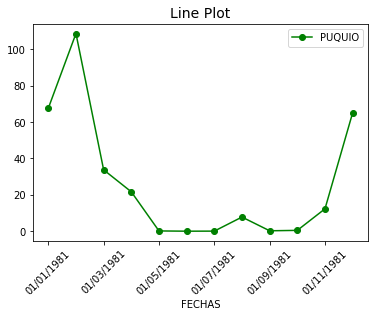

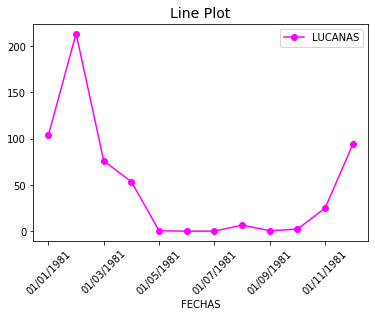

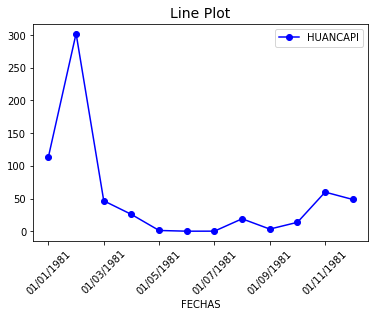

In [ ]:
recorte.plot(x='FECHAS', y = 'PUQUIO', kind='line', rot = 45, marker = 'o', color='green')
plt.title('Line Plot', fontsize=14)
plt.show()

recorte.plot(x='FECHAS', y = 'LUCANAS', kind='line', rot = 45, marker = 'o', color = 'magenta')
plt.title('Line Plot', fontsize=14)
plt.show()

recorte.plot(x='FECHAS', y = 'HUANCAPI', kind='line', rot = 45, marker = 'o', color = 'blue')
plt.title('Line Plot', fontsize=14)
plt.show()

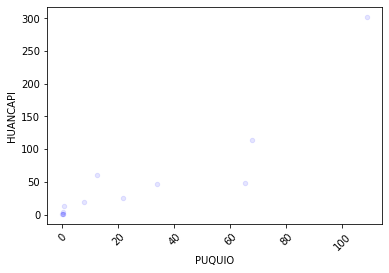

In [ ]:
recorte.plot(x='PUQUIO', y = 'HUANCAPI', kind='scatter', rot = 45, marker = 'o', color = 'blue', alpha = 0.1)

<function matplotlib.pyplot.show(*args, **kw)>

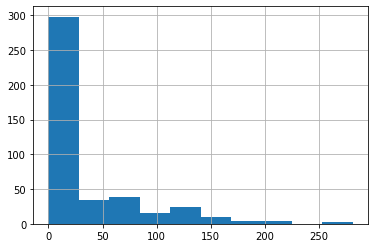

In [ ]:
df['PUQUIO'].hist(bins=10)
plt.show

### Gráficas

#### Gráficos simples

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/pp_salida1.csv'
df = pd.read_csv(path)
df.head()

,DATE,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P122,P123,P124,P125,P126,P127,P128,P129,P130,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149,P150,P151,P152,P153,P154,P155,P156,P157,P158,P159,P160,P161
0,01/01/1981,10.608933,6.087344,2.554819,1.307060,0.484502,0.188186,24.257719,22.962580,11.376714,3.857701,1.647270,0.811294,0.359088,0.186841,0.000000,0.000000,52.616318,48.858070,24.256874,9.159005,3.093917,1.252966,0.811074,0.274194,0.000000,0.000000,0.000000,0.000000,36.880219,43.434540,35.764172,39.580635,56.130131,16.013351,4.718503,1.902039,0.859711,0.481016,0.068565,...,0.425075,0.316723,0.025086,0.000000,0.274093,NaN,36.037109,31.386620,17.402258,6.924528,2.677795,0.660084,0.182494,0.315802,0.285183,0.000000,0.304540,0.155935,0.000000,0.000000,0.449837,NaN,19.687181,16.325054,10.308766,4.330928,1.805426,0.000000,0.000000,0.000000,0.000000,0.056051,0.000000,0.000000,0.000000,7.172928,1.148665,0.235987,0.072634,11.546514
1,01/02/1981,88.302040,48.279583,20.149616,8.825262,5.386672,4.184337,93.794800,106.047173,74.892715,30.363705,13.499932,7.381920,4.644121,4.146539,4.277095,3.685627,202.192276,208.510559,124.857681,58.178600,26.304296,12.189891,6.334581,4.284571,3.574172,2.799954,2.232891,1.476732,107.178886,147.486572,174.653565,217.806824,272.046875,121.602585,44.495834,20.529625,10.555015,4.619124,2.768187,...,4.003670,1.895880,0.954506,1.059287,1.187011,NaN,112.295944,77.929497,41.602692,22.303392,12.429198,6.847768,5.740261,4.863126,4.693711,4.409077,2.896387,1.934757,1.148166,0.303007,1.064212,NaN,59.465713,33.870655,21.356367,12.852532,7.909398,1.797031,1.805261,1.333051,0.999382,0.376242,1.248018,1.164219,1.144218,19.242121,11.201703,4.407936,3.575433,27.896908
2,01/03/1981,219.949554,247.960113,161.522858,149.679367,154.007523,94.826126,107.531197,186.034454,308.557404,223.643997,159.715591,146.047363,94.827660,60.075138,44.320221,18.800779,224.191071,222.783386,289.425934,338.067413,285.057434,227.004486,184.340469,124.966675,63.393654,37.172169,8.736139,3.427474,134.963745,169.489136,249.990112,339.047638,391.941467,428.368164,446.040558,276.740417,265.690155,250.011093,167.372894,...,16.701656,11.008372,4.654214,2.731664,3.308416,NaN,172.811752,246.889084,257.499878,185.898193,107.180656,101.105553,95.842232,49.996479,18.073946,16.817234,15.093976,9.466349,4.423991,4.771471,18.401443,NaN,174.612915,222.302811,222.771118,192.561859,114.806183,15.107269,10.657434,7.402997,9.822838,27.190750,8.962152,11.100165,7.760459,200.193497,169.388855,196.199921,190.918014,209.497284
3,01/04/1981,36.081974,30.216789,17.982313,8.681037,5.797594,4.216205,50.721863,62.806534,48.815525,25.722694,10.370521,4.289159,1.995343,0.845313,0.531554,0.584511,134.350739,97.135315,82.426155,50.941723,28.146696,12.172368,3.722343,0.977071,0.339680,0.196330,0.123548,0.000000,67.827339,87.922112,137.776367,147.667191,120.035004,60.763752,30.251331,22.892012,10.349721,2.393513,0.485065,...,0.000000,0.000000,0.000000,0.000000,0.470418,NaN,96.438980,88.504211,48.181618,29.831629,18.043003,8.434794,1.854340,0.182587,0.062219,0.038640,0.000000,0.000000,0.000000,0.000000,1.063605,NaN,66.249451,58.233376,44.238487,30.663624,16.508575,0.016816,0.000000,0.000000,0.000000,0.562367,0.000000,0.000000,0.000000,25.005825,16.371099,9.971101,7.750124,29.299707
4,01/05/1981,10.911409,4.697821,1.500158,0.500671,0.155915,0.270658,7.195982,9.269212,5.989180,2.016015,0.751357,0.345770,0.323859,0.302721,0.231500,0.506133,16.903521,12.300612,9.217038,4.448646,1.585664,0.534284,0.358338,0.138082,0.053205,0.000000,0.000000,0.000000,27.495581,23.297497,21.270996,17.539968,14.003787,6.399556,3.178644,1.139975,0.511942,0.294293,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.215915,NaN,14.688814,8.559403,4.861265,3.023998,1.624126,0.712933,0.197089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
print(df.head(13))

          DATE          P1          P2  ...        P159        P160        P161
0   01/01/1981   10.608933    6.087344  ...    0.235987    0.072634   11.546514
1   01/02/1981   88.302040   48.279583  ...    4.407936    3.575433   27.896908
2   01/03/1981  219.949554  247.960113  ...  196.199921  190.918014  209.497284
3   01/04/1981   36.081974   30.216789  ...    9.971101    7.750124   29.299707
4   01/05/1981   10.911409    4.697821  ...    0.158744    0.000000    6.568554
5   01/06/1981    5.764244    3.820415  ...    0.291434    0.036063    2.132307
6   01/07/1981    4.247416    2.146499  ...    0.135636    0.078069    0.000000
7   01/08/1981    1.471405    1.028794  ...    0.442809    0.262143    3.843332
8   01/09/1981    0.092305    0.199291  ...    0.000000    0.000000    0.761746
9   01/10/1981    4.722525    0.945042  ...    1.267412    0.578110    6.952442
10  01/11/1981    7.177631    5.002336  ...    0.195343    0.000000   11.689228
11  01/12/1981   12.580129    7.327457  

In [ ]:
df.DATE = pd.to_datetime(df.DATE, format='%d/%m/%Y')
df.head(13)

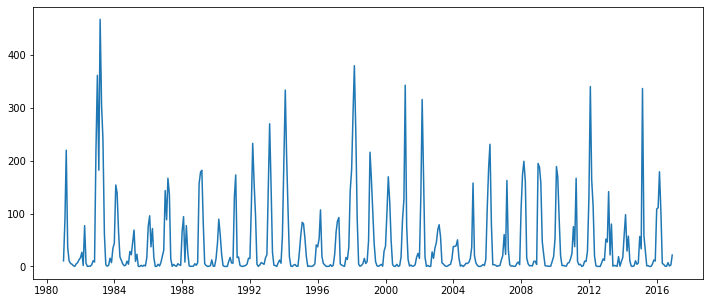

In [ ]:
plt.plot(df.DATE, df.P1);

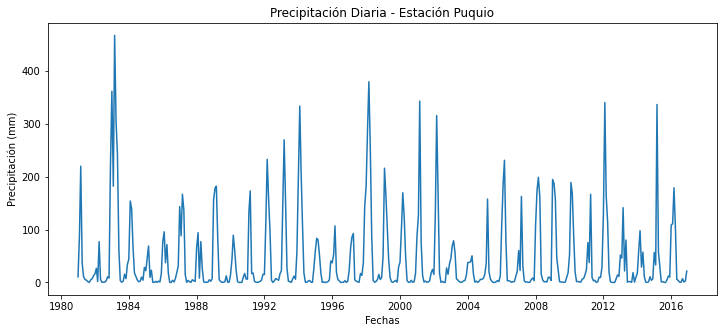

In [ ]:
# Agregando Labels a los ejes y título
plt.plot(df.DATE, df.P1) 
plt.xlabel('Fechas')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Diaria - Estación Puquio');

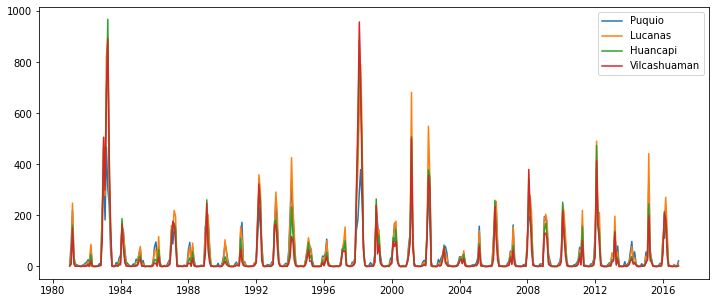

In [ ]:
# Ploteo de lineas multiples en una misma grafica
plt.plot(df.DATE, df.P1, label='Puquio') 
plt.plot(df.DATE, df.P2, label='Lucanas')
plt.plot(df.DATE, df.P3, label='Huancapi') 
plt.plot(df.DATE, df.P4, label='Vilcashuaman') 
plt.legend()

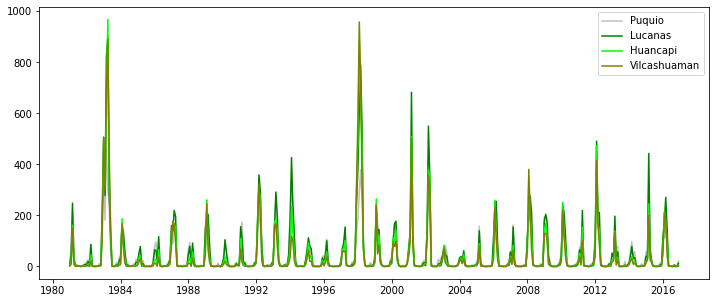

In [ ]:
# Ploteo de lineas multiples en una misma grafica
plt.plot(df.DATE, df.P1, label='Puquio', color='silver') 
plt.plot(df.DATE, df.P2, label='Lucanas', color='green')
plt.plot(df.DATE, df.P3, label='Huancapi', color='lime') 
plt.plot(df.DATE, df.P4, label='Vilcashuaman', color='olive') 
plt.legend();

# https://en.wikipedia.org/wiki/Web_colors

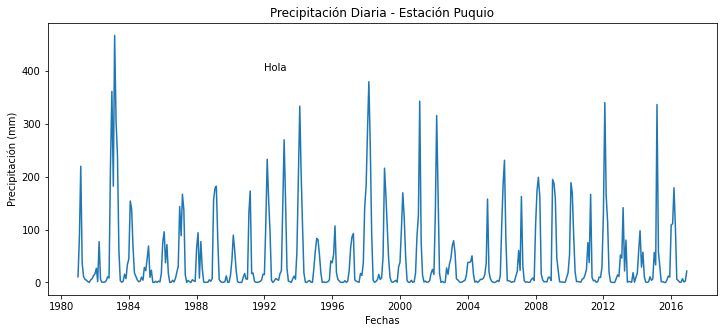

In [ ]:
# Agregando texto 
plt.plot(df.DATE, df.P1) 
plt.xlabel('Fechas')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Diaria - Estación Puquio')
# plt.text(pd.Timestamp('1982'), 0,'Hola')  # xcoord, ycoord, texto en ''
plt.text(pd.Timestamp('1992'), 400, 'Hola'); # ojo con el eje X ya que es fecha

''

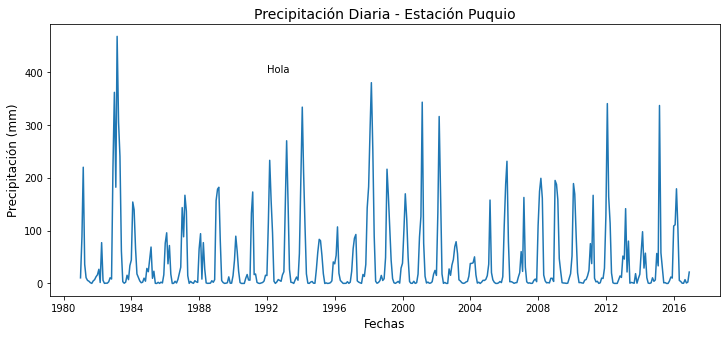

In [ ]:
# Modificando texto: fontsize
plt.plot(df.DATE, df.P1) 
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

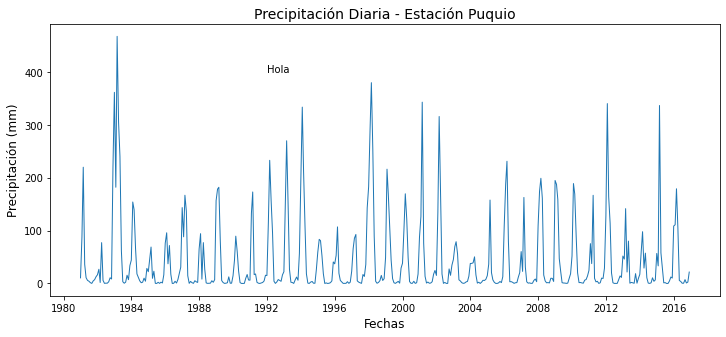

In [ ]:
# Modificando el grosor de líneas
plt.plot(df.DATE, df.P1, linewidth=1) # 1,2,3,4,5,6,7 
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

''

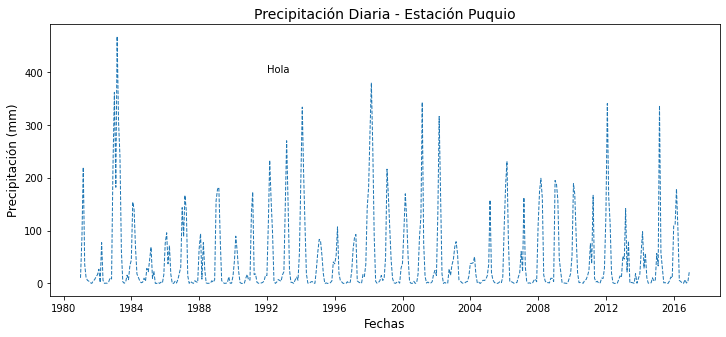

In [ ]:
# Modificando el tipo de líneas
plt.plot(df.DATE, df.P1, linewidth=1, linestyle='--') # '-','--','-.',':'
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

''

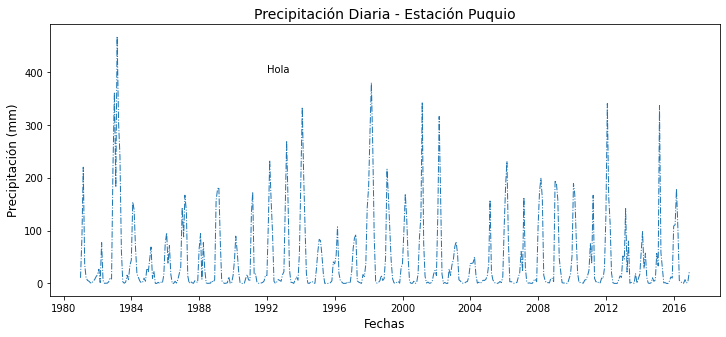

In [ ]:
# Modificando el tipo de líneas
plt.plot(df.DATE, df.P1, linewidth=1, linestyle='-.') # '-','--','-.',':'
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

''

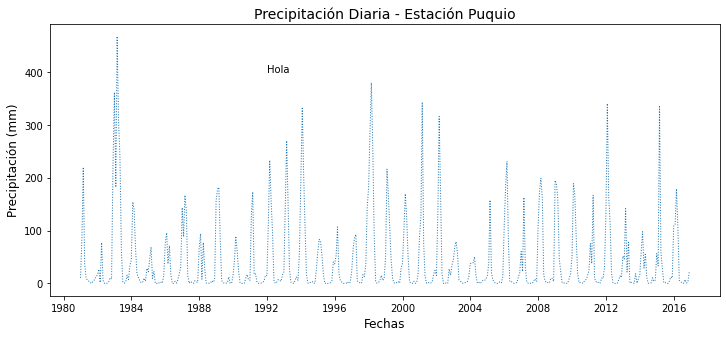

In [ ]:
# Modificando el tipo de líneas
plt.plot(df.DATE, df.P1, linewidth=1, linestyle=':') # '-','--','-.',':'
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14)

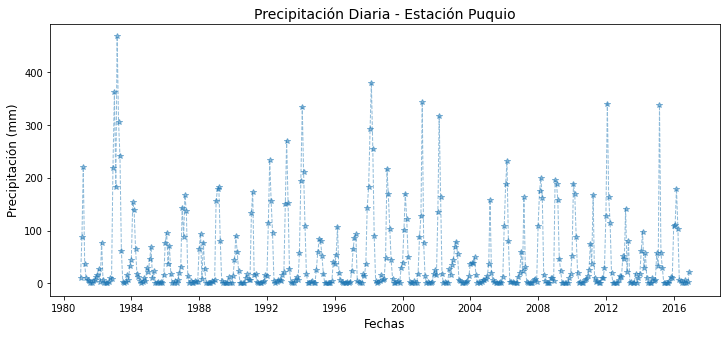

In [ ]:
# Agregando marcadores por puntos
plt.plot(df.DATE, df.P1, linewidth=1, linestyle='--', marker='*', alpha=0.5) # 's', 'o', 'd', '*', 'h'
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

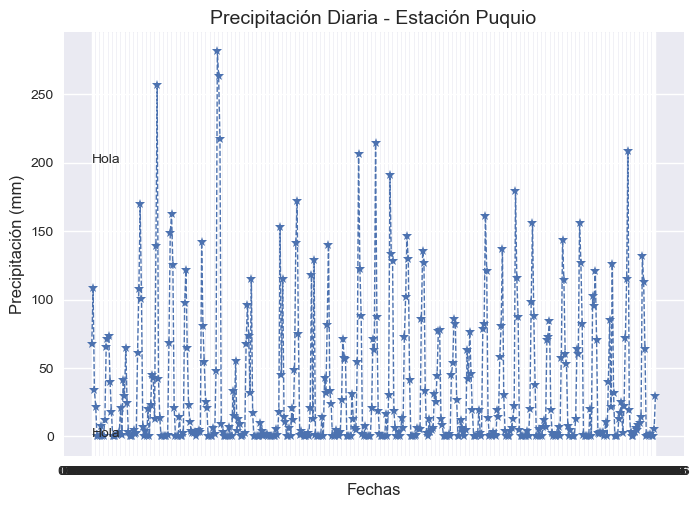

In [ ]:
# 4 Estilos de ploteo: 'fivethirtyeight', 'ggplot', 'seaborn' & 'default'
plt.style.use('seaborn')

plt.plot(df['FECHAS'], df['PUQUIO'], linewidth=1, linestyle='--', marker='*') # 's' squares, 'o', 'd', '*', 'h'
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.title('Precipitación Diaria - Estación Puquio', fontsize=14);

#### Scatterplots

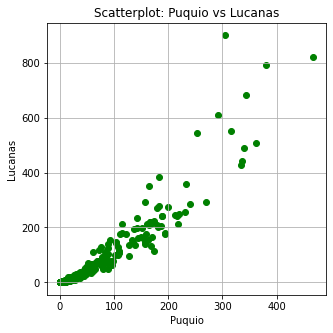

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df.P1, df.P2,
            color='green',
            marker='o')
plt.title('Scatterplot: Puquio vs Lucanas')#, fontsize=14)
plt.xlabel('Puquio')#, fontsize=12)
plt.ylabel('Lucanas')#, fontsize=12)
plt.grid();

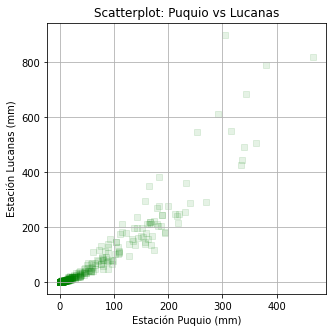

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df.P1, df.P2,
            color='green',
            marker='s',
            alpha=0.1) # alpha controla la transparencia: 0-1, las áreas mas oscuras presentan más puntos
plt.title('Scatterplot: Puquio vs Lucanas')#, fontsize=14)
plt.xlabel('Estación Puquio (mm)')#, fontsize=12)
plt.ylabel('Estación Lucanas (mm)')#, fontsize=12)
plt.grid();

#### Bar chart (usado para variables categoricas)

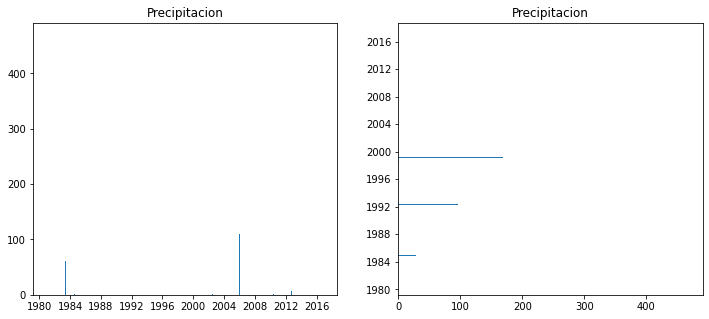

In [ ]:
plt.figure(figsize=(12,5))

# Vertical bar: plt.bar()
plt.subplot(121)
plt.bar(df.DATE, df.P1)
plt.title('Precipitacion')

# horizontal bar: plt.barh()
plt.subplot(122)
plt.barh(df.DATE, df.P1)
plt.title('Precipitacion');

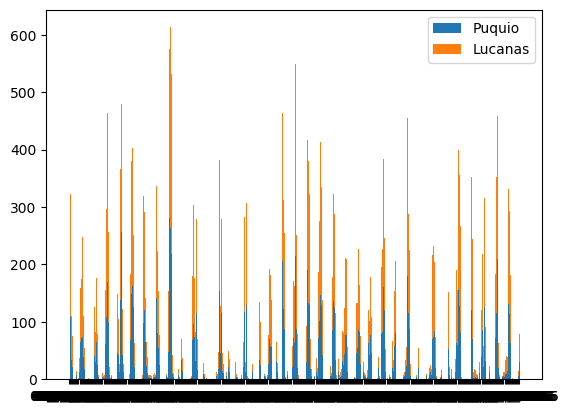

In [ ]:
# Diagrama de barras agrupadas
plt.bar(df.FECHAS, df.PUQUIO, label='Puquio')
plt.bar(df.FECHAS, df.LUCANAS, bottom =df.PUQUIO, label='Lucanas')
plt.legend()
plt.show()

#### Histograms with matplotlib

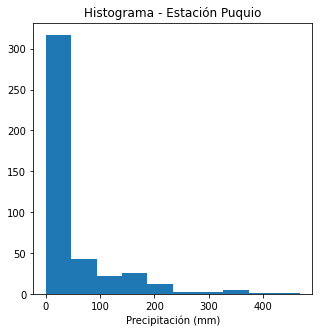

In [ ]:
plt.figure(figsize=(5,5))

plt.hist(df.P1) # Por defecto se crearán 10 clases
plt.title('Histograma - Estación Puquio')#, fontsize=14)
plt.xlabel('Precipitación (mm)');#, fontsize=12)

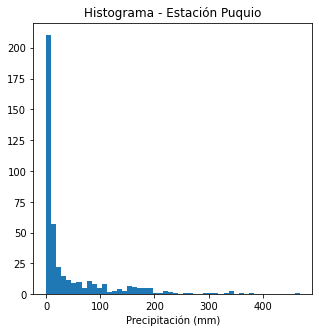

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(df.P1, bins = 50) # Se crearán 50 clases
plt.title('Histograma - Estación Puquio')#, fontsize=14)
plt.xlabel('Precipitación (mm)');#, fontsize=12)

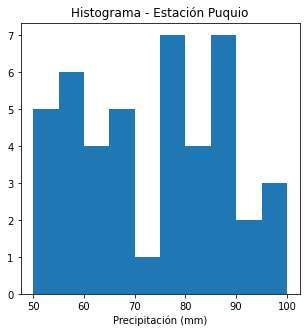

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(df.P1, range=(50,100)) # range=(xmin, xmax)
plt.title('Histograma - Estación Puquio')#, fontsize=14)
plt.xlabel('Precipitación (mm)');#, fontsize=12)

In [ ]:
# Normalización para dos variables en un mismo histograma

## Curso de LinkedIn: Python y Pandas 

### Gestión de datos en Python

#### Introducción a pandas

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/base_datos_2008_short.csv'

import pandas as pd
df = pd.read_csv(path) # nrows = 100
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1510383,2008,3,28,5,1444.0,1429,1711.0,1638,EV,4446,N718EV,147.0,129.0,103.0,33.0,15.0,ATL,ALB,852,2.0,42.0,0,NaN,0,15.0,0.0,18.0,0.0,0.0
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Year               10000 non-null  int64  
 2   Month              10000 non-null  int64  
 3   DayofMonth         10000 non-null  int64  
 4   DayOfWeek          10000 non-null  int64  
 5   DepTime            9813 non-null   float64
 6   CRSDepTime         10000 non-null  int64  
 7   ArrTime            9791 non-null   float64
 8   CRSArrTime         10000 non-null  int64  
 9   UniqueCarrier      10000 non-null  object 
 10  FlightNum          10000 non-null  int64  
 11  TailNum            9888 non-null   object 
 12  ActualElapsedTime  9786 non-null   float64
 13  CRSElapsedTime     9999 non-null   float64
 14  AirTime            9786 non-null   float64
 15  ArrDelay           9786 non-null   float64
 16  DepDelay           9813

In [ ]:
df.sample(frac= 1) # Mostrar el dataframe desordenado

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3444,6652956,2008,12,12,5,1639.0,1642,1807.0,1806,OO,6491,N969SW,88.0,84.0,60.0,1.0,-3.0,LAX,SMF,373,4.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5869,914839,2008,2,3,7,1122.0,1122,1249.0,1300,EV,4337,N870AS,87.0,98.0,67.0,-11.0,0.0,OAJ,ATL,399,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
598,6394402,2008,11,13,4,827.0,830,1012.0,1020,AA,2003,N5DVAA,165.0,170.0,137.0,-8.0,-3.0,BOS,ORD,867,12.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6492,6009546,2008,11,24,1,755.0,800,1016.0,1040,WN,3576,N913WN,141.0,160.0,131.0,-24.0,-5.0,DTW,MCO,957,5.0,5.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9140,3701459,2008,7,31,4,1939.0,1625,2042.0,1725,WN,87,N413WN,63.0,60.0,42.0,197.0,194.0,TPA,FLL,197,11.0,10.0,0,NaN,0,0.0,38.0,3.0,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7406,2822901,2008,5,16,5,1207.0,1215,1732.0,1732,NW,590,N556NW,205.0,197.0,180.0,0.0,-8.0,PDX,MSP,1426,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2391,4957555,2008,9,18,4,858.0,905,1131.0,1138,XE,2246,N17115,153.0,153.0,121.0,-7.0,-7.0,IAH,ORD,925,11.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1367,5161808,2008,9,2,2,1010.0,1015,1528.0,1545,FL,349,N176AT,198.0,210.0,176.0,-17.0,-5.0,LAS,MKE,1524,10.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4381,6645829,2008,12,1,1,825.0,816,1109.0,1014,OO,6017,N934SW,164.0,118.0,83.0,55.0,9.0,ORD,ICT,588,6.0,75.0,0,NaN,0,0.0,2.0,46.0,0.0,7.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.DepTime

0       1607.0
1       1956.0
2        921.0
3       1444.0
4        556.0
         ...  
9995    2249.0
9996    1127.0
9997    1103.0
9998    1709.0
9999     810.0
Name: DepTime, Length: 10000, dtype: float64

In [ ]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
df.values # para operaciones matriciales y así

array([[6193029, 2008, 11, ..., nan, nan, nan],
       [2566613, 2008, 5, ..., nan, nan, nan],
       [873200, 2008, 2, ..., nan, nan, nan],
       ...,
       [497153, 2008, 1, ..., 21.0, 0.0, 0.0],
       [2017490, 2008, 4, ..., nan, nan, nan],
       [897650, 2008, 2, ..., nan, nan, nan]], dtype=object)

In [ ]:
df2 = df.head(10)
df2

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1510383,2008,3,28,5,1444.0,1429,1711.0,1638,EV,4446,N718EV,147.0,129.0,103.0,33.0,15.0,ATL,ALB,852,2.0,42.0,0,NaN,0,15.0,0.0,18.0,0.0,0.0
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,666858,2008,2,21,4,852.0,850,943.0,950,WN,2614,N316SW,111.0,120.0,98.0,-7.0,2.0,MCO,BNA,616,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,3626868,2008,7,9,3,1824.0,1825,1919.0,1925,WN,1134,N741SA,55.0,60.0,45.0,-6.0,-1.0,SAT,DAL,248,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,6780985,2008,12,8,1,2145.0,2144,2231.0,2246,EV,5126,N857AS,46.0,62.0,29.0,-15.0,1.0,ATL,AVL,164,2.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1354034,2008,3,5,3,1910.0,1915,2217.0,2229,OO,6714,N916SW,127.0,134.0,105.0,-12.0,-5.0,DEN,MEM,872,4.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,4985402,2008,9,14,7,1230.0,1230,NaN,1427,OH,6480,N916CA,NaN,117.0,NaN,NaN,0.0,JAX,CVG,614,NaN,9.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


#### Filtrar datos en python

- [How to Filter Data in Python Pandas Dataframes using Conditional Statements](https://medium.com/@AIWatson/how-to-filter-data-in-python-pandas-dataframes-using-conditional-statements-69c4bb842de8)

In [ ]:
df.ArrDelay.head()

0    -5.0
1     5.0
2   -19.0
3    33.0
4     9.0
Name: ArrDelay, dtype: float64

In [ ]:
df[50:55]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
50,896281,2008,2,19,2,917.0,919,1053.0,1106,DL,1461,N624DL,96.0,107.0,73.0,-13.0,-2.0,ATL,RSW,515,5.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
51,3499203,2008,6,13,5,2255.0,2300,2337.0,2350,AA,1274,N4XPAA,42.0,50.0,31.0,-13.0,-5.0,DFW,AUS,190,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
52,6596444,2008,12,25,4,1005.0,1002,1105.0,1058,YV,7184,N17175,60.0,56.0,31.0,7.0,3.0,ORD,ATW,160,5.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
53,5394014,2008,10,6,1,1731.0,1730,1837.0,1835,WN,45,N327SW,66.0,65.0,45.0,2.0,1.0,DAL,HOU,239,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
54,6656822,2008,12,8,1,1844.0,1852,2032.0,2002,OO,6667,N928SW,168.0,130.0,119.0,30.0,-8.0,CID,DEN,692,8.0,41.0,0,NaN,0,0.0,0.0,30.0,0.0,0.0


**Filtrado con condicionales**

In [ ]:
# Usando una condición
df[df.ArrDelay > 60].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
21,637157,2008,2,12,2,2347.0,2105,100.0,2235,WN,2633,N645SW,73.0,90.0,61.0,145.0,162.0,MCI,DAL,461,6.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,145.0
25,3779741,2008,7,6,7,1350.0,1225,1645.0,1532,OH,5681,N695CA,175.0,187.0,135.0,73.0,85.0,MIA,JFK,1090,10.0,30.0,0,NaN,0,0.0,73.0,0.0,0.0,0.0


In [ ]:
# Usando una condición
df[df.ArrDelay != 60].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Origin.unique()

array(['LAS', 'SBP', 'CLT', 'ATL', 'PHX', 'MCO', 'SAT', 'DEN', 'JAX',
       'DSM', 'DFW', 'LGA', 'ONT', 'CVG', 'PDX', 'IAH', 'BOS', 'FNT',
       'MCI', 'CLE', 'SAN', 'MIA', 'ORF', 'OAK', 'HOU', 'MDW', 'GUC',
       'DCA', 'ORD', 'FLL', 'SLC', 'EWR', 'JFK', 'IND', 'PFN', 'DAL',
       'CID', 'MKE', 'TYS', 'BUR', 'BWI', 'TPA', 'EUG', 'DTW', 'OMA',
       'SYR', 'PIT', 'SPI', 'XNA', 'IAD', 'SAV', 'STL', 'BTV', 'SFO',
       'SEA', 'PHL', 'LNK', 'LAX', 'BGR', 'MSP', 'OGG', 'HNL', 'SMF',
       'GRR', 'RDU', 'ITO', 'ABQ', 'RNO', 'PBI', 'OKC', 'SHV', 'MEM',
       'RSW', 'BUF', 'BDL', 'TUS', 'PVD', 'ELP', 'CMH', 'COS', 'MSN',
       'JAN', 'MAF', 'LIT', 'MLU', 'SJU', 'BNA', 'MFR', 'MSY', 'MRY',
       'GRB', 'CSG', 'RDM', 'RIC', 'CAK', 'LMT', 'MHT', 'HRL', 'FAI',
       'TUL', 'ATW', 'JAC', 'PSG', 'HHH', 'KOA', 'SJC', 'HSV', 'MYR',
       'GJT', 'SBA', 'DRO', 'FWA', 'SWF', 'IDA', 'GRK', 'STT', 'CMI',
       'BHM', 'COD', 'ACV', 'ANC', 'ROC', 'AMA', 'FAT', 'TYR', 'PNS',
       'BRO', 'GEG',

In [ ]:
df[df.Origin == 'ISP'].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
664,5986935,2008,11,17,1,1105.0,1110,1404.0,1410,WN,3083,N478WN,179.0,180.0,165.0,-6.0,-5.0,ISP,TPA,1034,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
983,3043866,2008,6,17,2,NaN,935,NaN,1210,WN,1236,NaN,NaN,155.0,NaN,NaN,NaN,ISP,MCO,972,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Usando dos condiciones
df[(df.Origin == 'ISP') & (df.ArrDelay > 60)].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [ ]:
df[(df.Origin == 'ISP') | (df.ArrDelay > 60)].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
21,637157,2008,2,12,2,2347.0,2105,100.0,2235,WN,2633,N645SW,73.0,90.0,61.0,145.0,162.0,MCI,DAL,461,6.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,145.0
25,3779741,2008,7,6,7,1350.0,1225,1645.0,1532,OH,5681,N695CA,175.0,187.0,135.0,73.0,85.0,MIA,JFK,1090,10.0,30.0,0,NaN,0,0.0,73.0,0.0,0.0,0.0


In [ ]:
# Filtrar los valores ISP e IND de Origin
df[df.Origin.isin(['ISP', 'IND'])].head(20)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
47,497339,2008,1,26,6,1754.0,1800,1813.0,1815,AA,1058,N556AA,79.0,75.0,46.0,-2.0,-6.0,IND,ORD,177,21.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
529,6999009,2008,12,4,4,1051.0,1058,1234.0,1229,DL,1719,N940DL,103.0,91.0,79.0,5.0,-7.0,IND,ATL,432,4.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
630,1627993,2008,3,2,7,1722.0,1725,1748.0,1750,NW,1295,N368NB,86.0,85.0,60.0,-2.0,-3.0,IND,MEM,381,15.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
664,5986935,2008,11,17,1,1105.0,1110,1404.0,1410,WN,3083,N478WN,179.0,180.0,165.0,-6.0,-5.0,ISP,TPA,1034,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
699,953520,2008,2,22,5,1717.0,1607,1842.0,1717,FL,719,N240AT,265.0,250.0,221.0,85.0,70.0,IND,LAS,1591,11.0,33.0,0,NaN,0,0.0,0.0,15.0,0.0,70.0
707,3102789,2008,6,28,6,626.0,634,818.0,829,XE,2251,N15910,112.0,115.0,93.0,-11.0,-8.0,IND,EWR,644,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
936,3172444,2008,6,5,4,1658.0,1549,1701.0,1558,OO,6141,N774SK,63.0,69.0,38.0,63.0,69.0,IND,ORD,177,6.0,19.0,0,NaN,0,0.0,0.0,63.0,0.0,0.0
983,3043866,2008,6,17,2,NaN,935,NaN,1210,WN,1236,NaN,NaN,155.0,NaN,NaN,NaN,ISP,MCO,972,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1116,5437028,2008,10,19,7,926.0,925,1215.0,1230,WN,1928,N926WN,169.0,185.0,158.0,-15.0,1.0,ISP,RSW,1101,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1219,1547963,2008,3,20,4,920.0,925,1140.0,1149,FL,390,N289AT,140.0,144.0,126.0,-9.0,-5.0,IND,RSW,946,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Valores faltantes: NaN**

In [ ]:
df[pd.isna(df.SecurityDelay)].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,666858,2008,2,21,4,852.0,850,943.0,950,WN,2614,N316SW,111.0,120.0,98.0,-7.0,2.0,MCO,BNA,616,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df[pd.isna(df.SecurityDelay)].head())

5

#### Transformaciones de la base de datos

**Creando una columna nueva**

In [ ]:
df['HoursDelay'] = round(df.ArrDelay/60)
df['HoursDelay'].head()

0   -0.0
1    0.0
2   -0.0
3    1.0
4    0.0
Name: HoursDelay, dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'HoursDelay'],
      dtype='object')

**Eliminando filas**

In [ ]:
# Eliminar una columna
del(df['Unnamed: 0'])
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'HoursDelay'],
      dtype='object')

In [ ]:
# Eliminar columnas en el mismo dataframe
df.drop(['Distance', 'AirTime', 'TaxiOut'], axis=1, inplace=True)

In [ ]:
# Eliminar más columnas y creando otra variable
df_del = df.drop(['Distance', 'AirTime', 'TaxiOut'], axis= 1)
df_del.columns

In [ ]:
# Eliminar filas
# df.drop(range(0,1000000), inplace=True)

**Añadir nuevas filas**

In [ ]:
df.Origin.unique()

In [ ]:
df[df.Origin == 'IAD']

In [ ]:
dfIAD = df[df.Origin == 'IAD']
dfIND = df[df.Origin == 'IND']

In [ ]:
newdf = dfIAD.append(dfIND)
newdf.Origin

#### Groupby: obtener información esencial

Agrupando por categorías

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].max()

DayOfWeek
1    304.0
2    517.0
3    243.0
4    368.0
5    654.0
6    597.0
7    318.0
Name: ArrDelay, dtype: float64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].mean()

DayOfWeek
1     8.691156
2     6.158184
3     5.382479
4     7.817680
5    11.070866
6     6.705065
7    11.259179
Name: ArrDelay, dtype: float64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].count()

DayOfWeek
1    1470
2    1454
3    1404
4    1448
5    1397
6    1224
7    1389
Name: ArrDelay, dtype: int64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,1470.0,8.691156,36.977573,-34.0,-10.0,-2.0,12.00,304.0
2,1454.0,6.158184,37.456023,-48.0,-11.0,-3.0,9.75,517.0
3,1404.0,5.382479,30.537634,-42.0,-10.0,-2.0,10.00,243.0
4,1448.0,7.817680,34.297631,-52.0,-10.0,-1.0,13.00,368.0
5,1397.0,11.070866,41.331908,-46.0,-9.0,0.0,17.00,654.0
6,1224.0,6.705065,41.192551,-44.0,-11.0,-3.0,10.00,597.0
7,1389.0,11.259179,41.607147,-50.0,-10.0,-1.0,15.00,318.0


In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay', 'DepDelay'].mean() # Se espera que sean del mismo tipo de dato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ArrDelay,DepDelay
DayOfWeek,,
1,8.691156,10.767821
2,6.158184,8.131597
3,5.382479,7.098862
4,7.817680,9.589249
5,11.070866,11.850427
6,6.705065,9.224307
7,11.259179,13.393831


In [ ]:
# Rango de valores 
df.groupby(by='DayOfWeek')['ArrDelay'].max() - df.groupby(by='DayOfWeek')['ArrDelay'].min()

DayOfWeek
1    338.0
2    565.0
3    285.0
4    420.0
5    700.0
6    641.0
7    368.0
Name: ArrDelay, dtype: float64

In [ ]:
dfIADIND = df[df.Origin.isin(['IAD','IND'])]

In [ ]:
dfIADIND.groupby(by=['DayOfWeek','Origin'])['ArrDelay'].mean()

DayOfWeek  Origin
1          IAD       32.500000
           IND       -1.500000
2          IAD       -2.500000
           IND        0.250000
3          IAD      -11.750000
           IND       -6.000000
4          IAD       16.437500
           IND        3.187500
5          IAD       20.928571
           IND       18.272727
6          IAD       17.333333
           IND      -13.750000
7          IAD        8.764706
           IND        1.181818
Name: ArrDelay, dtype: float64

El orden con el que se ponen las columnas en el by afectará el resultado final.

In [ ]:
mygroupby = dfIADIND.groupby(by=['DayOfWeek','Origin'])['ArrDelay']

In [ ]:
mygroupby.max()

DayOfWeek  Origin
1          IAD       266.0
           IND        39.0
2          IAD        50.0
           IND        14.0
3          IAD         8.0
           IND        15.0
4          IAD       111.0
           IND        63.0
5          IAD       103.0
           IND       186.0
6          IAD       149.0
           IND         6.0
7          IAD        73.0
           IND        89.0
Name: ArrDelay, dtype: float64

In [ ]:
mygroupby.min()

DayOfWeek  Origin
1          IAD      -26.0
           IND      -12.0
2          IAD      -29.0
           IND      -24.0
3          IAD      -37.0
           IND      -17.0
4          IAD      -36.0
           IND      -15.0
5          IAD      -34.0
           IND      -15.0
6          IAD      -25.0
           IND      -33.0
7          IAD      -14.0
           IND      -21.0
Name: ArrDelay, dtype: float64

#### Tratar datos duplicados y perdidos

In [ ]:
dfduplicado = df.append(df)

In [ ]:
dfduplicado = dfduplicado.sample(frac=1)
dfclean = dfduplicado.drop_duplicates()

In [ ]:
len(dfclean) == len(df)

In [ ]:
dfclean.drop_duplicates(subset='DayofMonth')

In [ ]:
# Datos faltantes
df.dropna()

Ninguna de nuestras filas tiene un valor faltante

In [ ]:
df.dropna(thresh=25) # 25 entradas llenas de las 29 que hay

In [ ]:
df.dropna(thresh=len(df.columns)-2)

In [ ]:
df.dropna(subset= ['CancellationCode']) # Devolverá un dataframe donde no tenga NaN en dicha columna

#### Numpy

In [ ]:
import numpy as np

valoraciones = np.array([[8,7,8,5],[2,6,8,1],[8,8,9,5]])
valoraciones

In [ ]:
valoraciones[0][1]

In [ ]:
valoraciones[0,1]

In [ ]:
valoraciones2 = np.array([[[8,7,8,5],[2,6,8,1]],
                          [[8,7,8,5],[2,6,8,1]],
                          [[8,7,8,5],[2,6,8,1]]])
valoraciones2

Puede entenderse como 3 clientes con distintos datos, 4 productos con una valoración para cada producto.

In [ ]:
valoraciones2[0,1,2]

In [ ]:
np.zeros((3,2))

In [ ]:
valoraciones2 + np.ones((3,2,4))

In [ ]:
valoraciones2

In [ ]:
np.mean(valoraciones2)

In [ ]:
for i in range(0,3):
  print(f'Eje {i}:\n', np.mean(valoraciones2, axis=i),'\n')

In [ ]:
lista = [i for i in range(1,13)]
np.reshape(lista, (3,2,2))

In [ ]:
# Numpy con dataframes
np.median(df['DepTime'])

In [ ]:
np.random.rand(2,2)

### Gestión de datos avanzada

#### Correlaciones: Entender las relaciones entre variables

In [ ]:
# import pandas as pd
import numpy as np

$$
\rho_{X,Y} = \frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}} = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_{X}\sigma_{Y}}
$$

In [ ]:
np.corrcoef(df.ArrDelay, df.DepDelay)

In [ ]:
df.dropna(inplace=True, subset=['ArrDelay','DepDelay'])

In [ ]:
np.corrcoef([df['ArrDelay'], df['DepDelay'], df['DepTime']])

In [ ]:
df.drop(columns= ['Unnamed: 0', 'Month', 'Year', 'Cancelled', 'Diverted'], inplace=True)

In [ ]:
df.corr()

In [ ]:
corr = round(df.corr(),3)
corr.style.background_gradient() # Se ve mejor para jupyter notebook

#### Test de la Chi-Cuadrado

$$
X^2 = \sum^{k}_{i=1} \frac{(\text{observado}_i - \text{esperado}_i)^2}{\text{esperado}_i}
$$

In [ ]:
np.random.seed(0)
df = df[df['Origin'].isin(['ISP','IND'])]
df = df.sample(frac=1)
df

In [ ]:
df['BigDelay'] = df['ArrDelay'] > 30
observados = pd.crosstab(index=df['BigDelay'], columns=df['Origin'], margins=True)

In [ ]:
observados

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
test = chi2_contingency(observados)
test

In [ ]:
esperados = pd.DataFrame(test[3])
esperados

In [ ]:
esperados_rel = round(esperados.apply(lambda r: r/len(df)*100, axis=1),2)

In [ ]:
observados_rel = round(observados.apply(lambda r: r/len(df)*100, axis=1),2)

In [ ]:
observados_rel

In [ ]:
esperados_rel

In [ ]:
test[1]

**Resumen de Test de Hipótesis**
- Si el p-valor < 0.05, hay diferencias significativas: Hay relación entre variables
- Si el p-valor > 0.05, no hay diferencias significativas: No hay relación entre variables

#### Análisis de datos extremos

In [ ]:
x = df['ArrDelay'].dropna()

In [ ]:
Q1 = np.percentile(x,25)
Q3 = np.percentile(x,75)
rangointer = Q3 - Q1

In [ ]:
umbralinferior = Q1 - 1.5*rangointer
umbralsuperior = Q3 + 1.5*rangointer

In [ ]:
umbralinferior

In [ ]:
umbralsuperior

In [ ]:
np.mean(x > umbralsuperior)

In [ ]:
np.mean(x < umbralinferior)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
outliers = EllipticEnvelope(contamination= .01)

In [ ]:
var_list = ['DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']

In [ ]:
x = np.array(df.loc[:, var_list].dropna())

In [ ]:
outliers.fit(x)

In [ ]:
pred = outliers.predict(x)

In [ ]:
pred

In [ ]:
elips_outliers = np.where(pred == -1)[0]

In [ ]:
elips_outliers

#### Principios de las bases de datos relacionales

In [ ]:
data = [
        (1, 'Joan', 'Gasull', 25, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (1, 'Joan', 'Gasull', 25, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (1, 'Joan', 'Gasull', 25, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (2, 'Joan', 'Gasull', 33, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (2, 'Joan', 'Gasull', 33, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 40, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 40, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 25, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
]

labels = ['Comprador_id', 'Nombre', 'Apellido', 'Edad', 'Producto_id', 'Producto',
          'Precio', 'Coste', 'Margen', 'Cantidad','Fecha']

In [ ]:
df = pd.DataFrame.from_records(data, columns=labels)

In [ ]:
df

In [ ]:
compradores = df.drop_duplicates(subset= 'Comprador_id', keep='first')
compradores

In [ ]:
compradores = compradores[['Comprador_id', 'Nombre', 'Apellido', 'Edad']]
compradores

In [ ]:
productos = df.drop_duplicates(subset= 'Producto_id', keep='first')

In [ ]:
productos = productos[['Producto_id', 'Producto', 'Precio', 'Coste', 'Margen']]
productos

In [ ]:
compras = df[['Comprador_id', 'Producto_id', 'Fecha', 'Cantidad']]
compras

#### Joins. Trabajar con bases de datos relacionales

In [ ]:
consumidores = [
                ('A','Móvil'),
                ('B','Móvil'),
                ('A','Portátil'),
                ('A','Tablet'),
                ('B','Tablet'),
                ('C','Portátil'),
                ('D','Smartwatch'),
                ('E','Consola')
] 

con_labels = ['Consumidor', 'Producto']

con_df = pd.DataFrame.from_records(consumidores, columns= con_labels)

productores = [
               ('a','Móvil'),
               ('a','Smartwatch'),
               ('a','Tablet'),
               ('b','Portátil'),
               ('c','Sobremesa'),
               ('c','Portátil')
]

prod_labels = ['Productor', 'Producto']

prod_df = pd.DataFrame.from_records(productores, columns= prod_labels)

In [ ]:
con_df

In [ ]:
prod_df

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='outer')

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='inner') # No hay sobremesa ni consola

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='right')

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='left')

#### Paralelizar loops en Python

In [ ]:
from joblib import Parallel, delayed

In [ ]:
df.columns

In [ ]:
df_sub = df[['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']]
df_sub.head()

In [ ]:
def retraso_maximo(fila):
  if not np.isnan(fila).any():
    names = ['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']
    return names[fila.index(max(fila))]
  else:
    return 'None'

In [ ]:
results = []
for fila in df_sub.values.tolist():
  results.append(retraso_maximo(fila))

In [ ]:
results

In [ ]:
result = Parallel(n_jobs=2, backend= 'multiprocessing')(
    map(delayed(retraso_maximo),df_sub.values.tolist())
    )
result

### Visualización de datos en Matplotlib

#### Introducción al Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = np.unique(df.Cancelled, return_counts=True)
data

(array([0, 1]), array([9811,  189]))

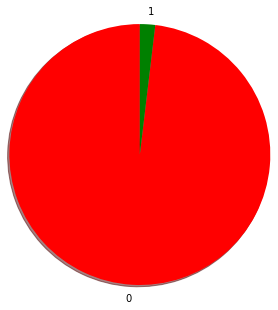

In [ ]:
plt.pie(x = data[1],
        labels = data[0],
        colors = ['Red','Green'],
        shadow = True,
        startangle = 90,
        radius = 1.5);

#### Modificar elementos del gráfico en Matplotlib

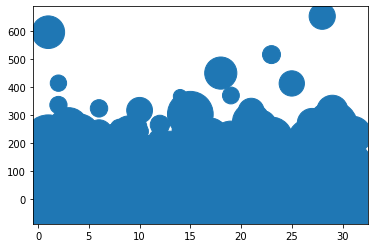

In [ ]:
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance);

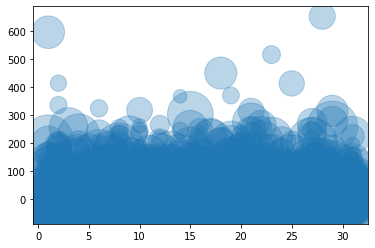

In [ ]:
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance, alpha=0.3);

In [ ]:
np.arange(1,8,1)

array([1, 2, 3, 4, 5, 6, 7])

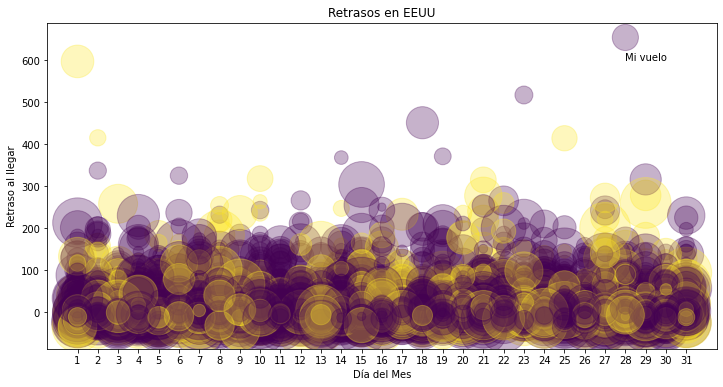

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance, alpha=0.3, c = df.DayOfWeek.isin([6,7])); # [6,7]
plt.title('Retrasos en EEUU')
plt.xlabel('Día del Mes')
plt.ylabel('Retraso al llegar')
# plt.ylim([0,150])
plt.xticks(list(np.arange(1,32,1))); # [0,15,30]
plt.text(x=28, y=600, s='Mi vuelo');

#### Etiquetas y leyendas en Matplotlib

In [ ]:
data = np.unique(df.DayOfWeek, return_counts=True)
labs = ['Lun','Mar','Mier','Jue','Vie','Sab','Dom']
data

(array([1, 2, 3, 4, 5, 6, 7]),
 array([1470, 1454, 1404, 1448, 1397, 1224, 1389]))

#### Gráficos para series temporales en Matplotlib

#### Histogramas y box plots en Matplotlib

#### Nubes de puntos y mapas de calor en Matplotlib


##### **Nubes de puntos**

In [ ]:
df.dropna(subset=['ArrDelay','DepDelay','Distance','AirTime'], inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)}) # Establecer el tamaño de las figuras de ahora en adelante

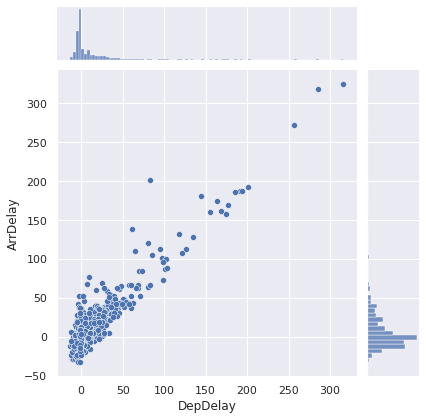

In [ ]:
df2 = df[df['Origin'].isin(['ATL', 'HOU', 'IND'])].sample(frac=1).head(1000)
sns.jointplot(data=df2, x='DepDelay', y='ArrDelay');

Se ha producido un scatterplot con histogramas para cada variable.

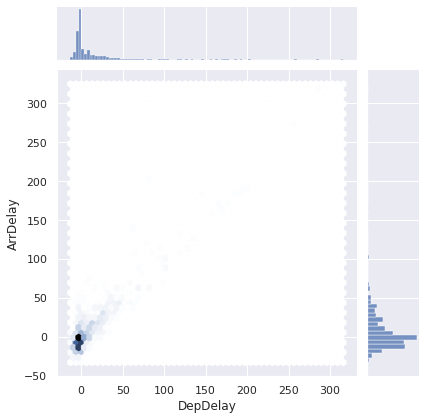

In [ ]:
sns.jointplot(data=df2, x='DepDelay', y='ArrDelay', kind='hex');

Para enfocarnos más en los datos, haremos un filtro

In [ ]:
df3 = df2[np.abs(df2['DepDelay'])<40]
df3 = df3[np.abs(df3['DepDelay'])<40]

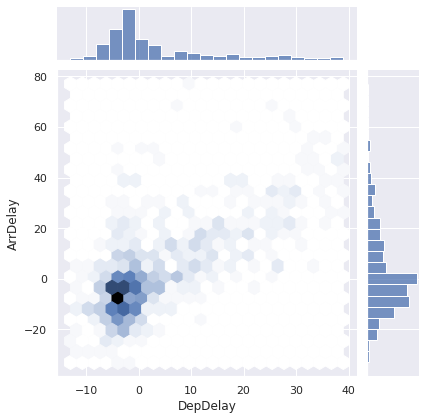

In [ ]:
sns.jointplot(data=df3, x='DepDelay', y='ArrDelay', kind='hex');

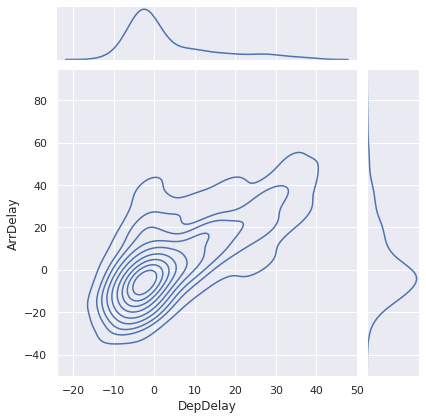

In [ ]:
sns.jointplot(data=df3, x='DepDelay', y='ArrDelay', kind='kde'); # Plot de densidad

##### **Mapas de calor**

In [ ]:
gb_df = pd.DataFrame(df2.groupby(['Origin','Month'], as_index=False,)['DepDelay'].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,11.808511
1,ATL,2,8.163265
2,ATL,3,15.590909
3,ATL,4,16.685714
4,ATL,5,5.655172


In [ ]:
data = gb_df.pivot('Month','Origin','DepDelay')
data

Origin,ATL,HOU,IND
Month,,,
1,11.808511,17.250000,-3.000000
2,8.163265,19.285714,23.000000
3,15.590909,47.500000,8.083333
4,16.685714,8.800000,-3.500000
5,5.655172,8.625000,16.375000
6,10.562500,11.166667,11.200000
7,13.142857,4.444444,6.333333
8,19.178571,25.400000,-6.857143
9,-0.800000,5.750000,-5.400000


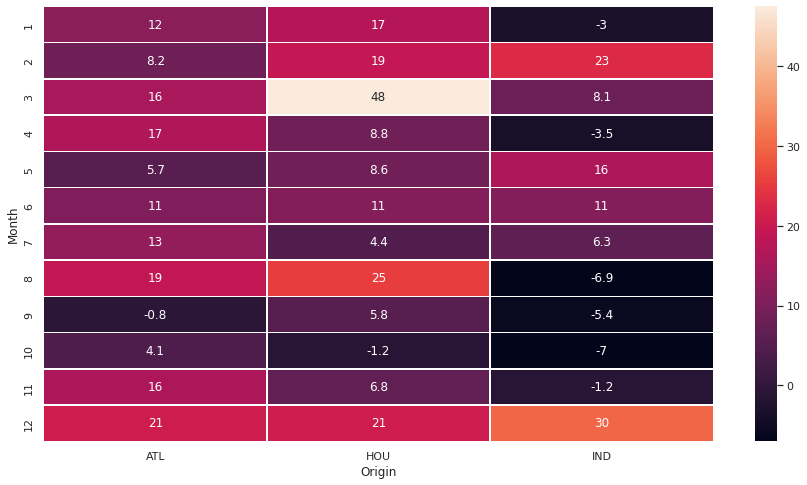

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data, annot=True, linewidths=0.5);